# 야구 데이터 분석

## 데이터 분석목표
- <b>KBO</b>
    - 연봉과 야구 승률의 상관관계
- <b>기아</b>    
    - 풍속, 풍향에 따른 기아 안타율
    - 불쾌지수에 따른 기아 안타율
    - 기아가 특정 구단에 승률이 낮은 이유
    - 관중수와 승률에 대한 상관관계

# 1. 연봉과 야구 승률의 상관관계 (엄다은)

In [1620]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1621]:
import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Hannanum 
import re

In [1622]:
w20 = pd.read_csv("./static/win2020.csv")
w21 = pd.read_csv("./static/win2021.csv")
w22 = pd.read_csv("./static/win2022.csv")
w23 = pd.read_csv("./static/win2023.csv")

In [1623]:
team_list = ['NC 다이노스', '두산 베어스', 'KT 위즈', 'LG 트윈스', '키움 히어로즈', 'KIA 타이거즈', '롯데 자이언츠', '삼성 라이온즈', 'SK 와이번스', '한화 이글스']

In [1624]:
w20 = w20.rename(columns={'2020':'팀'})
w21 = w21.rename(columns={'2021':'팀'})
w22 = w22.rename(columns={'2022':'팀'})
w23 = w23.rename(columns={'2023':'팀'})

In [1625]:
2

2

In [1626]:
w20.set_index('팀', inplace = True)
w21.set_index('팀', inplace = True)
w22.set_index('팀', inplace = True)
w23.set_index('팀', inplace = True)

In [1627]:
w20 = w20.sort_index()
w21 = w21.sort_index()
w22 = w22.sort_index()
w23 = w23.sort_index()

In [1628]:
w21 = w21.rename(index={'NC 다이노스':'NC', '두산 베어스':'두산', 'KT 위즈':'kt', 'LG 트윈스':'LG', '키움 히어로즈':'키움', 'KIA 타이거즈':'KIA', '롯데 자이언츠':'롯데', '삼성 라이온즈':'삼성', 'SK 와이번스':'SK', 'SSG 랜더스':'SK', '한화 이글스':'한화'})
w20 = w20.rename(index={'NC 다이노스':'NC', '두산 베어스':'두산', 'KT 위즈':'kt', 'LG 트윈스':'LG', '키움 히어로즈':'키움', 'KIA 타이거즈':'KIA', '롯데 자이언츠':'롯데', '삼성 라이온즈':'삼성', 'SK 와이번스':'SK', 'SSG 랜더스':'SK', '한화 이글스':'한화'})
w22 = w22.rename(index={'NC 다이노스':'NC', '두산 베어스':'두산', 'KT 위즈':'kt', 'LG 트윈스':'LG', '키움 히어로즈':'키움', 'KIA 타이거즈':'KIA', '롯데 자이언츠':'롯데', '삼성 라이온즈':'삼성', 'SK 와이번스':'SK', 'SSG 랜더스':'SK', '한화 이글스':'한화'})
w23 = w23.rename(index={'NC 다이노스':'NC', '두산 베어스':'두산', 'KT 위즈':'kt', 'LG 트윈스':'LG', '키움 히어로즈':'키움', 'KIA 타이거즈':'KIA', '롯데 자이언츠':'롯데', '삼성 라이온즈':'삼성', 'SK 와이번스':'SK', 'SSG 랜더스':'SK', '한화 이글스':'한화'})

In [1629]:
p20 = pd.read_csv("./static/2020_pay - 시트1.csv")
p21 = pd.read_csv("./static/2021_pay - 시트1.csv")
p22 = pd.read_csv("./static/2022_pay - 시트1.csv")
p23 = pd.read_csv("./static/2023_pay - 시트1.csv")

In [1630]:
p20.set_index('팀', inplace=True)
p21.set_index('팀', inplace=True)
p22.set_index('팀', inplace=True)
p23.set_index('팀', inplace=True)

In [1631]:
p20 = p20.rename(index={'넥센':'키움', 'SSG':'SK'})
p21 = p21.rename(index={'넥센':'키움', 'SSG':'SK'})
p22 = p22.rename(index={'넥센':'키움', 'SSG':'SK'})
p23 = p23.rename(index={'넥센':'키움', 'SSG':'SK'})

In [1632]:
p23

,연도,TOP25 연봉,시즌 성적
팀,,,
SK,2023,"2,282,100",76-65-3 (0.539)
삼성,2023,"1,261,400",61-82-1 (0.427)
두산,2023,"963,500",74-68-2 (0.521)
LG,2023,"921,050",86-56-2 (0.606)
NC,2023,"886,300",75-67-2 (0.528)
KIA,2023,"814,400",73-69-2 (0.514)
롯데,2023,"797,308",68-76-0 (0.472)
kt,2023,"776,300",79-62-3 (0.560)
키움,2023,"706,000",-- (0.000)


In [1633]:
p22

,연도,TOP25 연봉,시즌 성적
팀,,,
SK,2022,"1,982,500",88-52-4 (0.629)
NC,2022,"1,275,500",67-74-3 (0.475)
삼성,2022,"1,261,200",66-76-2 (0.465)
두산,2022,"1,176,700",60-82-2 (0.423)
LG,2022,"1,103,500",87-55-2 (0.613)
KIA,2022,"978,000",70-73-1 (0.490)
kt,2022,"938,800",80-62-2 (0.563)
롯데,2022,"798,238",64-76-4 (0.457)
키움,2022,"776,300",-- (0.000)


In [1634]:
p20.rename({'2020':'팀'})
p21.rename({'2021':'팀'})
p22.rename({'2022':'팀'})
p23.rename({'2023':'팀'})

,연도,TOP25 연봉,시즌 성적
팀,,,
SK,2023,"2,282,100",76-65-3 (0.539)
삼성,2023,"1,261,400",61-82-1 (0.427)
두산,2023,"963,500",74-68-2 (0.521)
LG,2023,"921,050",86-56-2 (0.606)
NC,2023,"886,300",75-67-2 (0.528)
KIA,2023,"814,400",73-69-2 (0.514)
롯데,2023,"797,308",68-76-0 (0.472)
kt,2023,"776,300",79-62-3 (0.560)
키움,2023,"706,000",-- (0.000)


In [1635]:
# p20.reset_index(inplace = True)
# p21.reset_index(inplace = True)
# p22.reset_index(inplace = True)
# p23.reset_index(inplace = True)
# w21.reset_index(inplace = True)
# w20.reset_index(inplace = True)
# w22.reset_index(inplace = True)
# w23.reset_index(inplace = True)

In [1636]:
tt20 = pd.concat([p20, w20])
tt20 = tt20[['TOP25 연봉', '승률']]

tt21 = pd.concat([p21, w21])
tt21 = tt21[['TOP25 연봉', '승률']]

tt22 = pd.concat([p22, w22])
tt22 = tt22[['TOP25 연봉', '승률']]

tt23 = pd.concat([p23, w23])
tt23 = tt23[['TOP25 연봉', '승률']]

In [1637]:
tt22

,TOP25 연봉,승률
팀,,
SK,"1,982,500",NaN
NC,"1,275,500",NaN
삼성,"1,261,200",NaN
두산,"1,176,700",NaN
LG,"1,103,500",NaN
KIA,"978,000",NaN
kt,"938,800",NaN
롯데,"798,238",NaN
키움,"776,300",NaN


In [1638]:
tt20['TOP25 연봉'] = tt20['TOP25 연봉'].str.replace(',', '', regex = True)
tt21['TOP25 연봉'] = tt21['TOP25 연봉'].str.replace(',', '', regex = True)
tt22['TOP25 연봉'] = tt22['TOP25 연봉'].str.replace(',', '', regex = True)
tt23['TOP25 연봉'] = tt23['TOP25 연봉'].str.replace(',', '', regex = True)

In [1639]:
print(tt23)

    TOP25 연봉     승률
팀                  
SK   2282100    NaN
삼성   1261400    NaN
두산    963500    NaN
LG    921050    NaN
NC    886300    NaN
KIA   814400    NaN
롯데    797308    NaN
kt    776300    NaN
키움    706000    NaN
한화    631750    NaN
KIA      NaN  0.514
kt       NaN  0.560
LG       NaN  0.606
NC       NaN  0.528
SK       NaN  0.539
두산       NaN  0.521
롯데       NaN  0.472
삼성       NaN  0.427
키움       NaN  0.411
한화       NaN  0.420


In [1640]:
tt20['종류'] = np.where(tt20['승률'] < 1, '승률', '연봉')
tt21['종류'] = np.where(tt21['승률'] < 1, '승률', '연봉')
tt22['종류'] = np.where(tt22['승률'] < 1, '승률', '연봉')
tt23['종류'] = np.where(tt23['승률'] < 1, '승률', '연봉')

In [1641]:
tt20['결과값'] = np.where(tt20['종류'] == '승률', tt20['승률']*2000000, tt20['TOP25 연봉'])
tt21['결과값'] = np.where(tt21['종류'] == '승률', tt21['승률']*2000000, tt21['TOP25 연봉'])
tt22['결과값'] = np.where(tt22['종류'] == '승률', tt22['승률']*2000000, tt22['TOP25 연봉'])
tt23['결과값'] = np.where(tt23['종류'] == '승률', tt23['승률']*2000000, tt23['TOP25 연봉'])

In [1642]:
tt20.drop(columns=['TOP25 연봉', '승률'], inplace=True)
tt20.reset_index(inplace=True)

tt21.drop(columns=['TOP25 연봉', '승률'], inplace=True)
tt21.reset_index(inplace=True)

tt22.drop(columns=['TOP25 연봉', '승률'], inplace=True)
tt22.reset_index(inplace=True)

tt23.drop(columns=['TOP25 연봉', '승률'], inplace=True)
tt23.reset_index(inplace=True)

In [1643]:

tt23.sort_values('팀')

,팀,종류,결과값
5,KIA,연봉,814400
10,KIA,승률,1028000.0
3,LG,연봉,921050
12,LG,승률,1212000.0
4,NC,연봉,886300
13,NC,승률,1056000.0
0,SK,연봉,2282100
14,SK,승률,1078000.0
7,kt,연봉,776300
11,kt,승률,1120000.0


In [1644]:
tt20 = tt20.astype({'결과값':'int'})
tt21 = tt21.astype({'결과값':'int'})
tt22 = tt22.astype({'결과값':'int'})
tt23 = tt23.astype({'결과값':'int'})

In [1645]:
display(tt20)
display(tt21)
display(tt22)
display(tt23)

,팀,종류,결과값
0,LG,연봉,1097800
1,롯데,연봉,1018000
2,NC,연봉,1005800
3,KIA,연봉,940900
4,두산,연봉,935200
5,삼성,연봉,892100
6,SK,연봉,874600
7,키움,연봉,855800
8,한화,연봉,789000
9,kt,연봉,774800


,팀,종류,결과값
0,SK,연봉,1323300
1,삼성,연봉,1075300
2,LG,연봉,1060400
3,NC,연봉,1052700
4,롯데,연봉,1008900
5,키움,연봉,1005300
6,KIA,연봉,880300
7,두산,연봉,869400
8,kt,연봉,866300
9,한화,연봉,617500


,팀,종류,결과값
0,SK,연봉,1982500
1,NC,연봉,1275500
2,삼성,연봉,1261200
3,두산,연봉,1176700
4,LG,연봉,1103500
5,KIA,연봉,978000
6,kt,연봉,938800
7,롯데,연봉,798238
8,키움,연봉,776300
9,한화,연봉,748620


,팀,종류,결과값
0,SK,연봉,2282100
1,삼성,연봉,1261400
2,두산,연봉,963500
3,LG,연봉,921050
4,NC,연봉,886300
5,KIA,연봉,814400
6,롯데,연봉,797308
7,kt,연봉,776300
8,키움,연봉,706000
9,한화,연봉,631750


In [1646]:
plt.rcParams.update({'font.family' : 'malgun Gothic'})

In [1647]:
tt20.sort_values(['종류', '결과값'], ascending=False)

,팀,종류,결과값
0,LG,연봉,1097800
1,롯데,연봉,1018000
2,NC,연봉,1005800
3,KIA,연봉,940900
4,두산,연봉,935200
5,삼성,연봉,892100
6,SK,연봉,874600
7,키움,연봉,855800
8,한화,연봉,789000
9,kt,연봉,774800


<Axes: xlabel='팀', ylabel='결과값'>

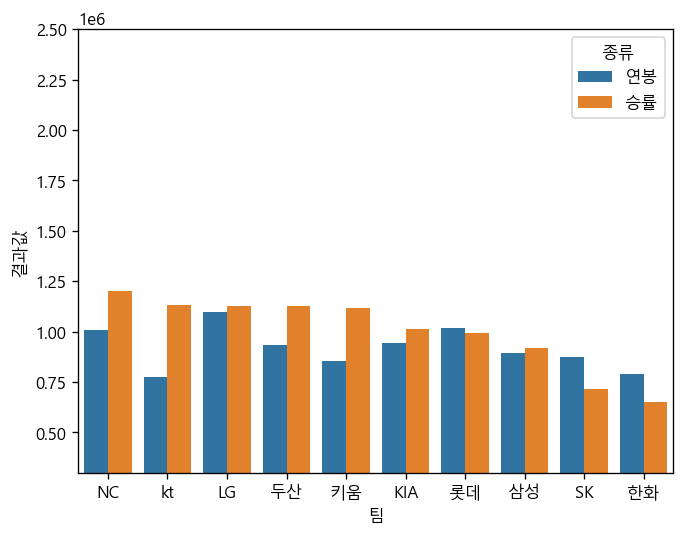

In [1648]:
plt.ylim([300000, 2500000])
sns.barplot(data=tt20, x = '팀', y = '결과값', hue = '종류', order = ['NC', 'kt', 'LG', '두산', '키움', 'KIA', '롯데', '삼성', 'SK', '한화'])

<Axes: xlabel='팀', ylabel='결과값'>

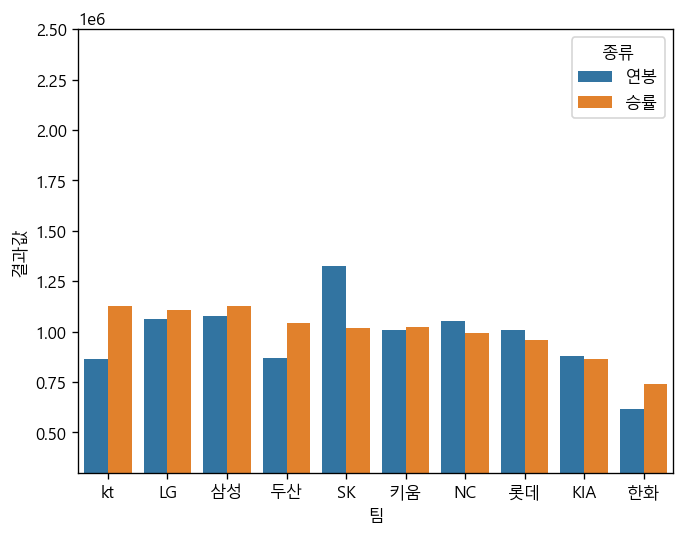

In [1649]:
plt.ylim([300000, 2500000])
sns.barplot(data=tt21, x = '팀', y = '결과값', hue = '종류', order = ['kt', 'LG',  '삼성','두산','SK','키움',  'NC', '롯데',  'KIA', '한화'])

<Axes: xlabel='팀', ylabel='결과값'>

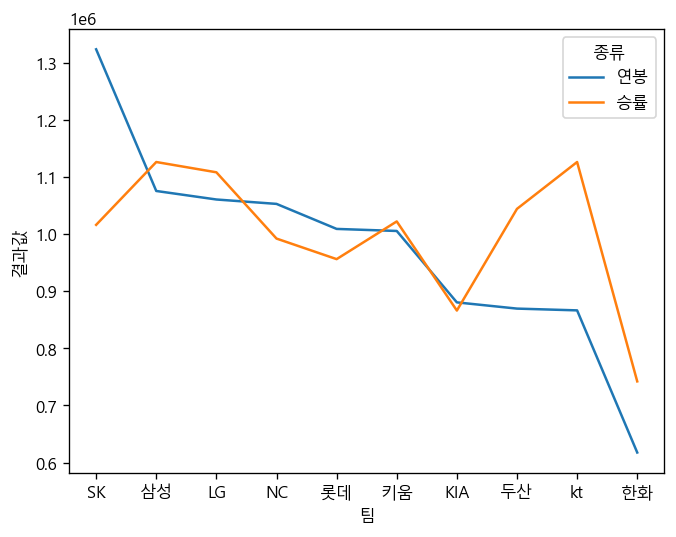

In [1650]:
sns.lineplot(data=tt21, x = '팀', y = '결과값', hue = '종류')

<Axes: xlabel='팀', ylabel='결과값'>

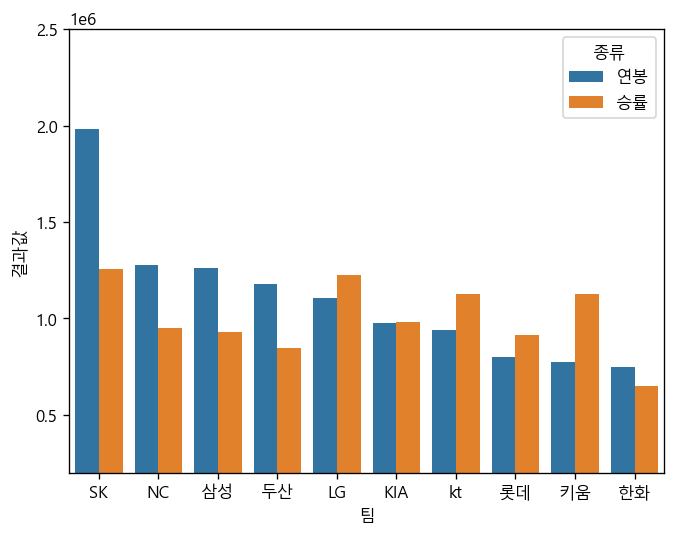

In [1651]:
plt.ylim([200000, 2500000])
sns.barplot(data=tt22, x = '팀', y = '결과값', hue = '종류')

<Axes: xlabel='팀', ylabel='결과값'>

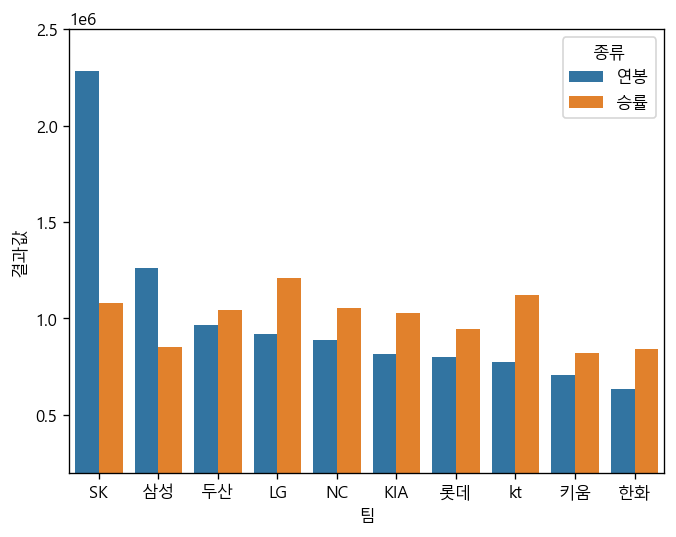

In [1652]:
plt.ylim([200000, 2500000])
sns.barplot(data=tt23, x = '팀', y = '결과값', hue = '종류')

# 2. 풍속, 풍향에 따른 기아 안타율 (정상권)

In [1653]:
# https://www.kaggle.com/datasets/park123/korea-baseball-datasetkbo-20152020
# 데이터 설명 링크
# GDAY_DS : 경기 날짜
# T_ID : 팀 이름
# VS_T_ID : 상대 팀 이름
# TEAM
# HH : 한화
# HT : 기아
# KT : KT
# LG : LG
# LT : 롯데
# NC : NC
# OB : 두산
# SK : SK
# SS : 삼성
# WO : 키움
# NE : 넥센
# PA : 타석에 들어선 횟수
# AB : 타석
# RBI : 타점
# RUN : 득점
# HIT : 안타
# H2 : 2루타
# H3 : 3루타
# HR : 홈런
# SB : 도루 성공
# CS : 도루 실패
# SF : 희생 플라이
# BB : 볼넷
# HP : 몸에맞는볼
# KK : 삼진
# GD : 병살
# OBP : 출루율
# win : 1 = 승리, 0 = 패배

In [1654]:
# bs에 2019년도 야구 기록 담기
bs = pd.read_csv('./static/edit_baseball_2019.csv')
bs

,GDAY_DS,T_ID,VS_T_ID,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SF,BB,HP,KK,GD,OBP,win
0,20190402,HT,SS,42,33,3,4,7,4,2,0,2,0,1,6,2,9,0,0.357143,1.0
1,20190402,SS,HT,36,34,1,1,6,2,0,0,2,0,0,2,0,8,1,0.222222,0.0
2,20190402,KT,OB,34,29,0,0,5,2,0,0,0,0,0,3,2,3,3,0.294118,0.0
3,20190402,OB,KT,40,33,9,9,10,6,0,1,2,0,2,5,0,5,1,0.375000,1.0
4,20190402,LG,HH,34,30,2,2,6,0,0,0,2,0,0,4,0,10,3,0.294118,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,20191023,OB,WO,37,32,5,6,9,2,0,1,0,1,1,4,0,8,1,0.351351,1.0
1380,20191025,OB,WO,40,35,5,5,8,2,2,1,4,0,0,4,1,11,0,0.325000,1.0
1381,20191025,WO,OB,32,28,0,0,4,0,0,0,0,1,0,4,0,2,1,0.250000,0.0
1382,20191026,OB,WO,50,42,10,11,14,10,0,0,2,0,0,6,1,11,1,0.428571,1.0


In [1655]:
# 팀별 지역값 만들어주기
# HH : 한화 : 대전
# HT : 기아 : 광주
# KT : KT : 수원
# LG : LG : 서울
# LT : 롯데 : 부산
# NC : NC : 창원
# OB : 두산 : 서울
# SK : SK : 인천
# SS : 삼성 : 대구
# WO : 키움 : 서울
def make_region(data):
    if data == 'HH':
        return '대전'
    elif data == 'HT':
        return '광주'
    elif data == 'KT':
        return '수원'
    elif data == 'LG':
        return '서울'
    elif data == 'LT':
        return '부산'
    elif data == 'NC':
        return '창원'
    elif data == 'OB':
        return '서울'
    elif data == 'SK':
        return '인천'
    elif data == 'SS':
        return '대구'
    elif data == 'WO':
        return '서울'
    elif data == 'NE':
        return '서울'
    
bs['지점명'] = bs['T_ID'].apply(make_region)

In [1656]:
# df에 2019 날씨 기록 담기
df = pd.read_csv('./static/edit_weather_2019.csv', encoding='EUC-KR')
df

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),지면온도(°C)
0,서울,2019-04-01 1:00,1.8,0.0,0.7,290.0,44.0,1012.2,0.0
1,서울,2019-04-01 2:00,1.2,0.0,0.6,290.0,50.0,1011.9,-0.2
2,서울,2019-04-01 3:00,0.7,0.0,0.6,290.0,53.0,1011.8,-0.5
3,서울,2019-04-01 4:00,0.4,0.0,0.8,290.0,55.0,1011.8,-0.7
4,서울,2019-04-01 5:00,0.6,0.0,1.2,290.0,58.0,1011.9,-0.9
...,...,...,...,...,...,...,...,...,...
41075,부산,2019-10-31 19:00,16.9,0.0,3.9,270.0,51.0,1011.3,14.0
41076,부산,2019-10-31 20:00,16.2,0.0,2.1,290.0,56.0,1011.5,13.3
41077,부산,2019-10-31 21:00,16.1,0.0,4.8,290.0,62.0,1011.4,13.2
41078,부산,2019-10-31 22:00,15.8,0.0,2.0,270.0,63.0,1011.8,12.7


In [1657]:
# 19시 부터 22시 야구 경기 시간대 날씨
new_df = df[(df['일시'].str[-5:-3] == '19') | 
                      (df['일시'].str[-5:-3] == '20') | 
                      (df['일시'].str[-5:-3] == '21') | 
                      (df['일시'].str[-5:-3] == '22')]

In [1658]:
new_df

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),지면온도(°C)
18,서울,2019-04-01 19:00,7.0,0.0,3.9,270.0,31.0,1010.5,8.3
19,서울,2019-04-01 20:00,6.3,0.0,2.4,270.0,36.0,1010.8,6.3
20,서울,2019-04-01 21:00,5.7,0.0,2.1,270.0,35.0,1011.5,4.8
21,서울,2019-04-01 22:00,5.1,0.0,2.0,270.0,46.0,1011.6,3.8
42,서울,2019-04-02 19:00,8.1,0.0,2.7,270.0,28.0,1011.1,9.4
...,...,...,...,...,...,...,...,...,...
41054,부산,2019-10-30 22:00,14.1,0.0,1.9,320.0,45.0,1012.4,11.1
41075,부산,2019-10-31 19:00,16.9,0.0,3.9,270.0,51.0,1011.3,14.0
41076,부산,2019-10-31 20:00,16.2,0.0,2.1,290.0,56.0,1011.5,13.3
41077,부산,2019-10-31 21:00,16.1,0.0,4.8,290.0,62.0,1011.4,13.2


In [1659]:
# 광주 경기날씨만 보기
gj_df=new_df[new_df['지점명']=='광주']
gj_df

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),지면온도(°C)
30828,광주,2019-04-01 19:00,8.8,0.0,3.3,250.0,55.0,1013.2,8.1
30829,광주,2019-04-01 20:00,8.8,0.0,2.6,250.0,61.0,1013.5,8.6
30830,광주,2019-04-01 21:00,8.1,0.0,2.7,250.0,67.0,1013.9,5.5
30831,광주,2019-04-01 22:00,7.9,0.0,2.5,250.0,72.0,1014.3,4.7
30852,광주,2019-04-02 19:00,9.2,0.0,1.9,290.0,29.0,1013.9,7.5
...,...,...,...,...,...,...,...,...,...
35919,광주,2019-10-30 22:00,11.9,0.0,0.5,50.0,72.0,1014.4,8.9
35940,광주,2019-10-31 19:00,16.4,0.0,0.2,0.0,71.0,1013.0,14.0
35941,광주,2019-10-31 20:00,15.4,0.0,0.0,0.0,75.0,1012.9,12.9
35942,광주,2019-10-31 21:00,15.3,0.0,0.0,0.0,79.0,1013.1,12.4


In [1660]:
#  데이터 프레임 합치기 위해 '일시' 변경
gj_df['일시']=gj_df['일시'].str[:10]
gj_df

C:\Users\smhrd\AppData\Local\Temp\ipykernel_3480\3769752115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gj_df['일시']=gj_df['일시'].str[:10]


,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),지면온도(°C)
30828,광주,2019-04-01,8.8,0.0,3.3,250.0,55.0,1013.2,8.1
30829,광주,2019-04-01,8.8,0.0,2.6,250.0,61.0,1013.5,8.6
30830,광주,2019-04-01,8.1,0.0,2.7,250.0,67.0,1013.9,5.5
30831,광주,2019-04-01,7.9,0.0,2.5,250.0,72.0,1014.3,4.7
30852,광주,2019-04-02,9.2,0.0,1.9,290.0,29.0,1013.9,7.5
...,...,...,...,...,...,...,...,...,...
35919,광주,2019-10-30,11.9,0.0,0.5,50.0,72.0,1014.4,8.9
35940,광주,2019-10-31,16.4,0.0,0.2,0.0,71.0,1013.0,14.0
35941,광주,2019-10-31,15.4,0.0,0.0,0.0,75.0,1012.9,12.9
35942,광주,2019-10-31,15.3,0.0,0.0,0.0,79.0,1013.1,12.4


In [1661]:
# 광주 구장 하루 평균 풍속 구하기
gj_wind_mean=gj_df.groupby(['일시'],as_index=False).agg(풍향=('풍향(16방위)','mean'),풍속=('풍속(m/s)','mean')).round(1)
gj_wind_mean

,일시,풍향,풍속
0,2019-04-01,250.0,2.8
1,2019-04-02,307.5,2.1
2,2019-04-03,322.5,1.2
3,2019-04-04,232.5,2.4
4,2019-04-05,300.0,1.2
...,...,...,...
209,2019-10-27,90.0,0.4
210,2019-10-28,187.5,1.5
211,2019-10-29,167.5,1.0
212,2019-10-30,132.5,0.8


In [1662]:
# 풍향에 따른 바랑 방향 설정
gj_wind_mean['바람방향'] = np.where(gj_wind_mean['풍향']<90,'북동',
                                np.where(gj_wind_mean['풍향']<180,'남동',
                                np.where(gj_wind_mean['풍향']<270,'남서',
                                np.where(gj_wind_mean['풍향']<360,'북서','북'))))

In [1663]:
gj_wind_mean

,일시,풍향,풍속,바람방향
0,2019-04-01,250.0,2.8,남서
1,2019-04-02,307.5,2.1,북서
2,2019-04-03,322.5,1.2,북서
3,2019-04-04,232.5,2.4,남서
4,2019-04-05,300.0,1.2,북서
...,...,...,...,...
209,2019-10-27,90.0,0.4,남동
210,2019-10-28,187.5,1.5,남서
211,2019-10-29,167.5,1.0,남동
212,2019-10-30,132.5,0.8,남동


In [1664]:
# baseball의 GDAY_DS 형식을 weather형식으로 변경하기
def day_split(data):
    data = str(data)
    return data[:4] + '-' + data[4:6] +'-' + data[6:]

In [1665]:
bs['일시'] = bs['GDAY_DS'].apply(day_split)

In [1666]:
kia=bs[bs['T_ID']=='HT']

In [1667]:
# 기아 경기 표
kia

,GDAY_DS,T_ID,VS_T_ID,PA,AB,RBI,RUN,HIT,H2,H3,...,CS,SF,BB,HP,KK,GD,OBP,win,지점명,일시
0,20190402,HT,SS,42,33,3,4,7,4,2,...,0,1,6,2,9,0,0.357143,1.0,광주,2019-04-02
10,20190403,HT,SS,39,35,3,3,9,4,0,...,0,1,3,0,13,1,0.307692,0.0,광주,2019-04-03
20,20190404,HT,SS,41,35,7,7,8,2,0,...,1,0,5,0,6,0,0.325000,0.0,광주,2019-04-04
39,20190405,HT,WO,37,35,5,6,11,8,2,...,0,0,2,0,9,1,0.351351,1.0,광주,2019-04-05
49,20190406,HT,WO,38,34,4,4,8,0,0,...,0,1,3,0,8,0,0.289474,0.0,광주,2019-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,20190921,HT,OB,37,36,2,3,8,2,0,...,0,0,1,0,7,1,0.243243,0.0,광주,2019-09-21
1306,20190923,HT,KT,34,33,1,1,7,6,0,...,1,0,1,0,10,0,0.235294,0.0,광주,2019-09-23
1317,20190924,HT,WO,36,34,5,5,11,6,2,...,1,0,2,0,4,0,0.361111,1.0,광주,2019-09-24
1326,20190926,HT,LT,37,31,3,3,3,0,0,...,1,0,5,1,9,0,0.243243,1.0,광주,2019-09-26


In [1668]:
# 기아 경기표 와 경기 날씨표 합치기
kia_wind_hit=pd.merge(gj_wind_mean,kia,how='inner',on='일시')
kia_wind_hit


,일시,풍향,풍속,바람방향,GDAY_DS,T_ID,VS_T_ID,PA,AB,RBI,...,SB,CS,SF,BB,HP,KK,GD,OBP,win,지점명
0,2019-04-02,307.5,2.1,북서,20190402,HT,SS,42,33,3,...,2,0,1,6,2,9,0,0.357143,1.0,광주
1,2019-04-03,322.5,1.2,북서,20190403,HT,SS,39,35,3,...,0,0,1,3,0,13,1,0.307692,0.0,광주
2,2019-04-04,232.5,2.4,남서,20190404,HT,SS,41,35,7,...,4,1,0,5,0,6,0,0.325000,0.0,광주
3,2019-04-05,300.0,1.2,북서,20190405,HT,WO,37,35,5,...,0,0,0,2,0,9,1,0.351351,1.0,광주
4,2019-04-06,225.0,2.4,남서,20190406,HT,WO,38,34,4,...,2,0,1,3,0,8,0,0.289474,0.0,광주
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2019-09-21,50.0,4.6,북동,20190921,HT,OB,37,36,2,...,0,0,0,1,0,7,1,0.243243,0.0,광주
132,2019-09-23,125.0,0.9,남동,20190923,HT,KT,34,33,1,...,2,1,0,1,0,10,0,0.235294,0.0,광주
133,2019-09-24,47.5,1.0,북동,20190924,HT,WO,36,34,5,...,0,1,0,2,0,4,0,0.361111,1.0,광주
134,2019-09-26,17.5,0.5,북동,20190926,HT,LT,37,31,3,...,2,1,0,5,1,9,0,0.243243,1.0,광주


In [1669]:
# 풍속과 안타 , 2루타, 3루타, 홈런 구분
kia_batt = kia_wind_hit[['일시','바람방향','풍속','T_ID','VS_T_ID','AB','HIT', 'H2','H3','HR']]
kia_batt

,일시,바람방향,풍속,T_ID,VS_T_ID,AB,HIT,H2,H3,HR
0,2019-04-02,북서,2.1,HT,SS,33,7,4,2,0
1,2019-04-03,북서,1.2,HT,SS,35,9,4,0,0
2,2019-04-04,남서,2.4,HT,SS,35,8,2,0,1
3,2019-04-05,북서,1.2,HT,WO,35,11,8,2,1
4,2019-04-06,남서,2.4,HT,WO,34,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...
131,2019-09-21,북동,4.6,HT,OB,36,8,2,0,0
132,2019-09-23,남동,0.9,HT,KT,33,7,6,0,0
133,2019-09-24,북동,1.0,HT,WO,34,11,6,2,1
134,2019-09-26,북동,0.5,HT,LT,31,3,0,0,1


In [1670]:
# 총 안타 횟수 구하기
kia_batt['안타횟수']=kia_batt[['HIT','H2','H3','HR']].sum(axis=1)
kia_batt

C:\Users\smhrd\AppData\Local\Temp\ipykernel_3480\1236638416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kia_batt['안타횟수']=kia_batt[['HIT','H2','H3','HR']].sum(axis=1)


,일시,바람방향,풍속,T_ID,VS_T_ID,AB,HIT,H2,H3,HR,안타횟수
0,2019-04-02,북서,2.1,HT,SS,33,7,4,2,0,13
1,2019-04-03,북서,1.2,HT,SS,35,9,4,0,0,13
2,2019-04-04,남서,2.4,HT,SS,35,8,2,0,1,11
3,2019-04-05,북서,1.2,HT,WO,35,11,8,2,1,22
4,2019-04-06,남서,2.4,HT,WO,34,8,0,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...
131,2019-09-21,북동,4.6,HT,OB,36,8,2,0,0,10
132,2019-09-23,남동,0.9,HT,KT,33,7,6,0,0,13
133,2019-09-24,북동,1.0,HT,WO,34,11,6,2,1,20
134,2019-09-26,북동,0.5,HT,LT,31,3,0,0,1,4


In [1671]:
# 타석과 비교후 타율 구하기
kia_batt['타율']=(kia_batt['안타횟수']/kia_batt['AB']).round(3)
kia_batt

C:\Users\smhrd\AppData\Local\Temp\ipykernel_3480\3960630000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kia_batt['타율']=(kia_batt['안타횟수']/kia_batt['AB']).round(3)


,일시,바람방향,풍속,T_ID,VS_T_ID,AB,HIT,H2,H3,HR,안타횟수,타율
0,2019-04-02,북서,2.1,HT,SS,33,7,4,2,0,13,0.394
1,2019-04-03,북서,1.2,HT,SS,35,9,4,0,0,13,0.371
2,2019-04-04,남서,2.4,HT,SS,35,8,2,0,1,11,0.314
3,2019-04-05,북서,1.2,HT,WO,35,11,8,2,1,22,0.629
4,2019-04-06,남서,2.4,HT,WO,34,8,0,0,1,9,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...
131,2019-09-21,북동,4.6,HT,OB,36,8,2,0,0,10,0.278
132,2019-09-23,남동,0.9,HT,KT,33,7,6,0,0,13,0.394
133,2019-09-24,북동,1.0,HT,WO,34,11,6,2,1,20,0.588
134,2019-09-26,북동,0.5,HT,LT,31,3,0,0,1,4,0.129


In [1672]:
# 최대 타율 풍속 구하기
kia_batt.query('타율==타율.max()')

,일시,바람방향,풍속,T_ID,VS_T_ID,AB,HIT,H2,H3,HR,안타횟수,타율
39,2019-05-21,남서,1.6,HT,LT,35,16,10,2,0,28,0.8


In [1673]:
# 최소 타율 풍속 구하기
kia_batt.query('타율==타율.min()')

,일시,바람방향,풍속,T_ID,VS_T_ID,AB,HIT,H2,H3,HR,안타횟수,타율
33,2019-05-14,남서,2.0,HT,KT,29,2,0,0,0,2,0.069


In [1674]:
# 기아의 평균 타율
k_batt_avr=kia_batt['타율'].mean().round(3)
k_batt_avr

0.382

In [1675]:
# 평균 이상 타율 의 풍속
kia_batt[kia_batt['타율']>=k_batt_avr]['풍속'].mean().round(1)

1.7

In [1676]:
# 평균 이하 타율의 풍속
kia_batt[kia_batt['타율']<=k_batt_avr]['풍속'].mean().round(1)

1.6

In [1677]:
plt.rcParams.update({'font.family':'Malgun Gothic'})

<Axes: xlabel='풍속', ylabel='타율'>

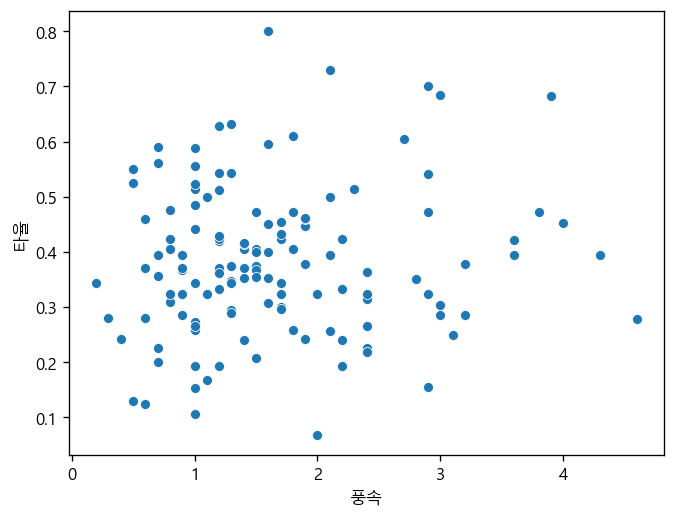

In [1678]:
sns.scatterplot(data=kia_batt,x='풍속',y='타율')

In [1679]:
# 풍속 별로 바람세기 구분
kia_batt['바람세기']=np.where(kia_batt['풍속']>=3.4,'강',
       np.where(kia_batt['풍속']>=2.2,'중','약' ))

# 바람세기 별로 평균 타율 구하기
wind_batt=kia_batt.groupby(['바람세기'],as_index=False).agg(AVG=('타율','mean')).round(3)
wind_batt

C:\Users\smhrd\AppData\Local\Temp\ipykernel_3480\716122205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kia_batt['바람세기']=np.where(kia_batt['풍속']>=3.4,'강',


,바람세기,AVG
0,강,0.442
1,약,0.383
2,중,0.361


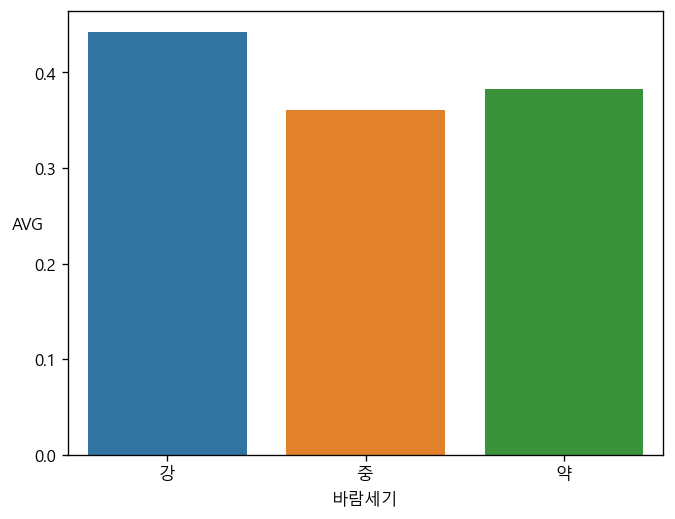

In [1680]:
# 바람 세기에 따른 평균타율
sns.barplot(data=wind_batt ,x='바람세기',y='AVG',order=('강','중','약'))
plt.ylabel('AVG', rotation=0)
plt.savefig('./static/바람 세기에 따른 평균타율 그래프')

In [1681]:
# 바람세기가 강일때 바람방향
wind_dire=kia_batt[kia_batt['바람세기']=='강']['바람방향'].value_counts()
wind_dire=pd.DataFrame(wind_dire)
wind_dire.reset_index(inplace=True)
wind_dire

,바람방향,count
0,남서,4
1,북동,2
2,남동,1


### 전체 경기중 바람 방향에 따른 평균 타율

In [1682]:
batt=[kia_batt[kia_batt['바람방향']=='북동']['타율'].mean().round(3),
  kia_batt[kia_batt['바람방향']=='남동']['타율'].mean().round(3),
  kia_batt[kia_batt['바람방향']=='남서']['타율'].mean().round(3),
  kia_batt[kia_batt['바람방향']=='북서']['타율'].mean().round(3)]
batt

[0.365, 0.422, 0.372, 0.382]

In [1683]:
row=['북동','남동','남서','북서']
row

batt=[kia_batt[kia_batt['바람방향']=='북동']['타율'].mean().round(3),
  kia_batt[kia_batt['바람방향']=='남동']['타율'].mean().round(3),
  kia_batt[kia_batt['바람방향']=='남서']['타율'].mean().round(3),
  kia_batt[kia_batt['바람방향']=='북서']['타율'].mean().round(3)]
batt

speed=[kia_batt[kia_batt['바람방향']=='북동']['풍속'].mean().round(1),
  kia_batt[kia_batt['바람방향']=='남동']['풍속'].mean().round(1),
  kia_batt[kia_batt['바람방향']=='남서']['풍속'].mean().round(1),
  kia_batt[kia_batt['바람방향']=='북서']['풍속'].mean().round(1)]
speed

u={'바람방향':row,'평균풍속':speed,'평균타율':batt}
u=pd.DataFrame(u)
u

r=kia_batt['바람방향'].value_counts()
r

wind_avr=pd.merge(u,r,how='outer',on='바람방향')
wind_avr.sort_values('평균타율',ascending=False)

,바람방향,평균풍속,평균타율,count
1,남동,1.2,0.422,27
3,북서,1.3,0.382,15
2,남서,1.8,0.372,75
0,북동,1.8,0.365,19


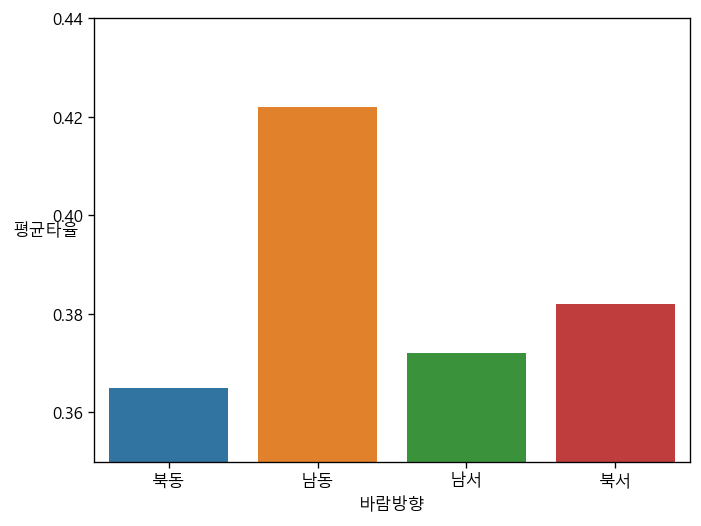

In [1684]:
sns.barplot(data=wind_avr,x='바람방향',y='평균타율')
plt.ylim([0.35,0.44])
plt.ylabel('평균타율', rotation=0)
plt.savefig('./static/바람 방향에 따른 평균타율 그래프')

### 대체적으로 바람세기가 강할 때 타율이 높게 나오고  바람세기가 중간일 때 타율이 가장 낮게 나왔다.

### 바람세기가 강할때 바람방향은 주로 남서쪽으로 불 때였고 전체 경기중 타율이 가장 높게 나올때는 남동쪽으로 불때였다.

### 광주-KIA 챔피언스 필드 와 몇 구장은 북동쪽을 바라보게 설치 되었지만 그럼에도 남쪽으로 바람이 불때 타율이 높았다.


# 3. 불쾌지수에 따른 기아 안타율 (임은영)

In [1685]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

import seaborn as sns

In [1686]:
bs = pd.read_csv('./static/edit_baseball_2019.csv')

In [1687]:
# 기아팀만 뽑아내기
bs_ht=bs.query('T_ID =="HT"') 
bs_ht

,GDAY_DS,T_ID,VS_T_ID,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SF,BB,HP,KK,GD,OBP,win
0,20190402,HT,SS,42,33,3,4,7,4,2,0,2,0,1,6,2,9,0,0.357143,1.0
10,20190403,HT,SS,39,35,3,3,9,4,0,0,0,0,1,3,0,13,1,0.307692,0.0
20,20190404,HT,SS,41,35,7,7,8,2,0,1,4,1,0,5,0,6,0,0.325000,0.0
39,20190405,HT,WO,37,35,5,6,11,8,2,1,0,0,0,2,0,9,1,0.351351,1.0
49,20190406,HT,WO,38,34,4,4,8,0,0,1,2,0,1,3,0,8,0,0.289474,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,20190921,HT,OB,37,36,2,3,8,2,0,0,0,0,0,1,0,7,1,0.243243,0.0
1306,20190923,HT,KT,34,33,1,1,7,6,0,0,2,1,0,1,0,10,0,0.235294,0.0
1317,20190924,HT,WO,36,34,5,5,11,6,2,1,0,1,0,2,0,4,0,0.361111,1.0
1326,20190926,HT,LT,37,31,3,3,3,0,0,1,2,1,0,5,1,9,0,0.243243,1.0


In [1688]:
# 안타율 구하기
bs_ht['안타횟수']=bs_ht[['HIT','H2','H3','HR']].sum(axis=1)


C:\Users\smhrd\AppData\Local\Temp\ipykernel_3480\2980796637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs_ht['안타횟수']=bs_ht[['HIT','H2','H3','HR']].sum(axis=1)


In [1689]:
bs_ht['안타율']=(bs_ht['안타횟수']/bs_ht['AB']).round(3)

C:\Users\smhrd\AppData\Local\Temp\ipykernel_3480\4204027784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs_ht['안타율']=(bs_ht['안타횟수']/bs_ht['AB']).round(3)


In [1690]:
bs_ht

,GDAY_DS,T_ID,VS_T_ID,PA,AB,RBI,RUN,HIT,H2,H3,...,CS,SF,BB,HP,KK,GD,OBP,win,안타횟수,안타율
0,20190402,HT,SS,42,33,3,4,7,4,2,...,0,1,6,2,9,0,0.357143,1.0,13,0.394
10,20190403,HT,SS,39,35,3,3,9,4,0,...,0,1,3,0,13,1,0.307692,0.0,13,0.371
20,20190404,HT,SS,41,35,7,7,8,2,0,...,1,0,5,0,6,0,0.325000,0.0,11,0.314
39,20190405,HT,WO,37,35,5,6,11,8,2,...,0,0,2,0,9,1,0.351351,1.0,22,0.629
49,20190406,HT,WO,38,34,4,4,8,0,0,...,0,1,3,0,8,0,0.289474,0.0,9,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,20190921,HT,OB,37,36,2,3,8,2,0,...,0,0,1,0,7,1,0.243243,0.0,10,0.278
1306,20190923,HT,KT,34,33,1,1,7,6,0,...,1,0,1,0,10,0,0.235294,0.0,13,0.394
1317,20190924,HT,WO,36,34,5,5,11,6,2,...,1,0,2,0,4,0,0.361111,1.0,20,0.588
1326,20190926,HT,LT,37,31,3,3,3,0,0,...,1,0,5,1,9,0,0.243243,1.0,4,0.129


In [1691]:
# 날씨 데이터 불러오기
df = pd.read_csv('./static/edit_weather_2019.csv', encoding='EUC-KR')
df

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),지면온도(°C)
0,서울,2019-04-01 1:00,1.8,0.0,0.7,290.0,44.0,1012.2,0.0
1,서울,2019-04-01 2:00,1.2,0.0,0.6,290.0,50.0,1011.9,-0.2
2,서울,2019-04-01 3:00,0.7,0.0,0.6,290.0,53.0,1011.8,-0.5
3,서울,2019-04-01 4:00,0.4,0.0,0.8,290.0,55.0,1011.8,-0.7
4,서울,2019-04-01 5:00,0.6,0.0,1.2,290.0,58.0,1011.9,-0.9
...,...,...,...,...,...,...,...,...,...
41075,부산,2019-10-31 19:00,16.9,0.0,3.9,270.0,51.0,1011.3,14.0
41076,부산,2019-10-31 20:00,16.2,0.0,2.1,290.0,56.0,1011.5,13.3
41077,부산,2019-10-31 21:00,16.1,0.0,4.8,290.0,62.0,1011.4,13.2
41078,부산,2019-10-31 22:00,15.8,0.0,2.0,270.0,63.0,1011.8,12.7


In [1692]:
# 습구온도(°C) = 온도(°C) - (100 - 상대습도(%)) / 5
df['기온(°C)']-((100-df['습도(%)'])/5)   

0       -9.4
1       -8.8
2       -8.7
3       -8.6
4       -7.8
        ... 
41075    7.1
41076    7.4
41077    8.5
41078    8.4
41079    6.7
Length: 41080, dtype: float64

In [1693]:
#불쾌지수(DI) = 0.72(기온+습구온도) + 40.6
df['불쾌지수'] = 0.72*(df['기온(°C)']+(df['기온(°C)']-((100-df['습도(%)'])/5)))+40.6  

In [1694]:
df

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),지면온도(°C),불쾌지수
0,서울,2019-04-01 1:00,1.8,0.0,0.7,290.0,44.0,1012.2,0.0,35.128
1,서울,2019-04-01 2:00,1.2,0.0,0.6,290.0,50.0,1011.9,-0.2,35.128
2,서울,2019-04-01 3:00,0.7,0.0,0.6,290.0,53.0,1011.8,-0.5,34.840
3,서울,2019-04-01 4:00,0.4,0.0,0.8,290.0,55.0,1011.8,-0.7,34.696
4,서울,2019-04-01 5:00,0.6,0.0,1.2,290.0,58.0,1011.9,-0.9,35.416
...,...,...,...,...,...,...,...,...,...,...
41075,부산,2019-10-31 19:00,16.9,0.0,3.9,270.0,51.0,1011.3,14.0,57.880
41076,부산,2019-10-31 20:00,16.2,0.0,2.1,290.0,56.0,1011.5,13.3,57.592
41077,부산,2019-10-31 21:00,16.1,0.0,4.8,290.0,62.0,1011.4,13.2,58.312
41078,부산,2019-10-31 22:00,15.8,0.0,2.0,270.0,63.0,1011.8,12.7,58.024


In [1695]:
# 불쾌지수,일시 컬럼 뽑기
new=df['불쾌지수']
new_date = df['일시']
dic={'불쾌지수':new, '일시':new_date}
new=pd.DataFrame(dic)
new

,불쾌지수,일시
0,35.128,2019-04-01 1:00
1,35.128,2019-04-01 2:00
2,34.840,2019-04-01 3:00
3,34.696,2019-04-01 4:00
4,35.416,2019-04-01 5:00
...,...,...
41075,57.880,2019-10-31 19:00
41076,57.592,2019-10-31 20:00
41077,58.312,2019-10-31 21:00
41078,58.024,2019-10-31 22:00


In [1696]:
# 일시 데이터에서 시간 빼기
new['일시'] = pd.to_datetime(new['일시'])

In [1697]:
new['일시'] = new['일시'].dt.strftime('%Y-%m-%d')

In [1698]:
new=new.groupby('일시',as_index=False).agg(일평균불쾌지수 = ('불쾌지수', 'mean'))

In [1699]:
new=new.rename(columns={'일시':'년월일'})
new

,년월일,일평균불쾌지수
0,2019-04-01,41.24800
1,2019-04-02,42.94825
2,2019-04-03,43.62325
3,2019-04-04,46.67425
4,2019-04-05,50.57650
...,...,...
209,2019-10-27,51.79225
210,2019-10-28,54.04975
211,2019-10-29,55.99300
212,2019-10-30,53.15650


In [1700]:
def day_split(data):
    data = str(data)
    return data[:4] + '-' + data[4:6] +'-' + data[6:]

In [1701]:
# GDAY_DS 를 년월일 형식으로 만들기
bs_ht['년월일'] = bs_ht['GDAY_DS'].apply(day_split)

C:\Users\smhrd\AppData\Local\Temp\ipykernel_3480\32912566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs_ht['년월일'] = bs_ht['GDAY_DS'].apply(day_split)


In [1702]:
bs_ht

,GDAY_DS,T_ID,VS_T_ID,PA,AB,RBI,RUN,HIT,H2,H3,...,SF,BB,HP,KK,GD,OBP,win,안타횟수,안타율,년월일
0,20190402,HT,SS,42,33,3,4,7,4,2,...,1,6,2,9,0,0.357143,1.0,13,0.394,2019-04-02
10,20190403,HT,SS,39,35,3,3,9,4,0,...,1,3,0,13,1,0.307692,0.0,13,0.371,2019-04-03
20,20190404,HT,SS,41,35,7,7,8,2,0,...,0,5,0,6,0,0.325000,0.0,11,0.314,2019-04-04
39,20190405,HT,WO,37,35,5,6,11,8,2,...,0,2,0,9,1,0.351351,1.0,22,0.629,2019-04-05
49,20190406,HT,WO,38,34,4,4,8,0,0,...,1,3,0,8,0,0.289474,0.0,9,0.265,2019-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,20190921,HT,OB,37,36,2,3,8,2,0,...,0,1,0,7,1,0.243243,0.0,10,0.278,2019-09-21
1306,20190923,HT,KT,34,33,1,1,7,6,0,...,0,1,0,10,0,0.235294,0.0,13,0.394,2019-09-23
1317,20190924,HT,WO,36,34,5,5,11,6,2,...,0,2,0,4,0,0.361111,1.0,20,0.588,2019-09-24
1326,20190926,HT,LT,37,31,3,3,3,0,0,...,0,5,1,9,0,0.243243,1.0,4,0.129,2019-09-26


In [1703]:
# bs_ht(야구데이터)와 new(일평균불쾌지수) 데이터 합치기
bs_new=pd.merge(bs_ht,new,how='left',on='년월일')
bs_new

,GDAY_DS,T_ID,VS_T_ID,PA,AB,RBI,RUN,HIT,H2,H3,...,BB,HP,KK,GD,OBP,win,안타횟수,안타율,년월일,일평균불쾌지수
0,20190402,HT,SS,42,33,3,4,7,4,2,...,6,2,9,0,0.357143,1.0,13,0.394,2019-04-02,42.94825
1,20190403,HT,SS,39,35,3,3,9,4,0,...,3,0,13,1,0.307692,0.0,13,0.371,2019-04-03,43.62325
2,20190404,HT,SS,41,35,7,7,8,2,0,...,5,0,6,0,0.325000,0.0,11,0.314,2019-04-04,46.67425
3,20190405,HT,WO,37,35,5,6,11,8,2,...,2,0,9,1,0.351351,1.0,22,0.629,2019-04-05,50.57650
4,20190406,HT,WO,38,34,4,4,8,0,0,...,3,0,8,0,0.289474,0.0,9,0.265,2019-04-06,49.66150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,20190921,HT,OB,37,36,2,3,8,2,0,...,1,0,7,1,0.243243,0.0,10,0.278,2019-09-21,64.87825
132,20190923,HT,KT,34,33,1,1,7,6,0,...,1,0,10,0,0.235294,0.0,13,0.394,2019-09-23,63.82600
133,20190924,HT,WO,36,34,5,5,11,6,2,...,2,0,4,0,0.361111,1.0,20,0.588,2019-09-24,64.12000
134,20190926,HT,LT,37,31,3,3,3,0,0,...,5,1,9,0,0.243243,1.0,4,0.129,2019-09-26,68.15200


In [1704]:
# 년월일, 안타율, 일평균불쾌지수 컬럼만 뽑기
bs_new_3=bs_new[['년월일','안타율','일평균불쾌지수']]
bs_new_3

,년월일,안타율,일평균불쾌지수
0,2019-04-02,0.394,42.94825
1,2019-04-03,0.371,43.62325
2,2019-04-04,0.314,46.67425
3,2019-04-05,0.629,50.57650
4,2019-04-06,0.265,49.66150
...,...,...,...
131,2019-09-21,0.278,64.87825
132,2019-09-23,0.394,63.82600
133,2019-09-24,0.588,64.12000
134,2019-09-26,0.129,68.15200


### 불쾌지수 빈도에 따른 파이그래프

In [1705]:
# bs_new_3 카피 데이터 만들기
df = bs_new_3.copy()
df

,년월일,안타율,일평균불쾌지수
0,2019-04-02,0.394,42.94825
1,2019-04-03,0.371,43.62325
2,2019-04-04,0.314,46.67425
3,2019-04-05,0.629,50.57650
4,2019-04-06,0.265,49.66150
...,...,...,...
131,2019-09-21,0.278,64.87825
132,2019-09-23,0.394,63.82600
133,2019-09-24,0.588,64.12000
134,2019-09-26,0.129,68.15200


In [1706]:
# 불쾌지수 빈도에 따른 파이 그래프 만들기
bins = [-1,65,75,100] #시간대 분류
labels =['불쾌지수 낮음','불쾌지수 보통','불쾌지수 높음']
pie =pd.cut(df['일평균불쾌지수'],bins=bins,labels=labels)
pie

0      불쾌지수 낮음
1      불쾌지수 낮음
2      불쾌지수 낮음
3      불쾌지수 낮음
4      불쾌지수 낮음
        ...   
131    불쾌지수 낮음
132    불쾌지수 낮음
133    불쾌지수 낮음
134    불쾌지수 보통
135    불쾌지수 보통
Name: 일평균불쾌지수, Length: 136, dtype: category
Categories (3, object): ['불쾌지수 낮음' < '불쾌지수 보통' < '불쾌지수 높음']

In [1707]:
r_pie=pie.value_counts().sort_index()
r_pie

일평균불쾌지수
불쾌지수 낮음    49
불쾌지수 보통    64
불쾌지수 높음    23
Name: count, dtype: int64

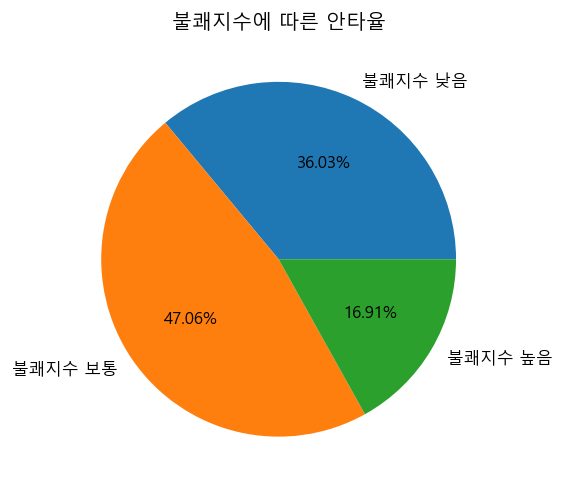

In [1708]:
plt.pie(r_pie,labels=labels,autopct='%1.2f%%')
plt.title('불쾌지수에 따른 안타율')
plt.show()
# 해당 pie chart는 불쾌지수의 빈도에 대한 비율이지, 불쾌지수에 따른 안타율이 아님....
# 안타율과 불쾌지수의 상관관계를 구해야함!

In [1709]:
df

,년월일,안타율,일평균불쾌지수
0,2019-04-02,0.394,42.94825
1,2019-04-03,0.371,43.62325
2,2019-04-04,0.314,46.67425
3,2019-04-05,0.629,50.57650
4,2019-04-06,0.265,49.66150
...,...,...,...
131,2019-09-21,0.278,64.87825
132,2019-09-23,0.394,63.82600
133,2019-09-24,0.588,64.12000
134,2019-09-26,0.129,68.15200


### 스케일링

In [1710]:
# 상관관계를 구하기 전, 안타율과 일평균불쾌지수의 값들이 차이가 심하게 남
# 그래서 스케일링(동일한 범위로 맞춤) 작업이 필요해보임
from sklearn.preprocessing import MinMaxScaler # 0 ~ 1 의 범위로 맞춰줌!
m_scaler = MinMaxScaler()
min_max_hit = m_scaler.fit_transform(df[['안타율','일평균불쾌지수']]) # 각각의 컬럼에 대해 스케일링 작업!
m_df = pd.DataFrame(min_max_hit, columns=['안타율_minMax','일평균불쾌지수_minMax'])
m_df

,안타율_minMax,일평균불쾌지수_minMax
0,0.444596,0.000000
1,0.413133,0.018560
2,0.335157,0.102452
3,0.766074,0.209750
4,0.268126,0.184591
...,...,...
131,0.285910,0.602998
132,0.444596,0.574065
133,0.709986,0.582149
134,0.082079,0.693015


In [1711]:
# 산점도 그래프 그리기
X = m_df.index.values
Y1 = m_df['안타율_minMax'].values
Y2 = m_df['일평균불쾌지수_minMax'].values

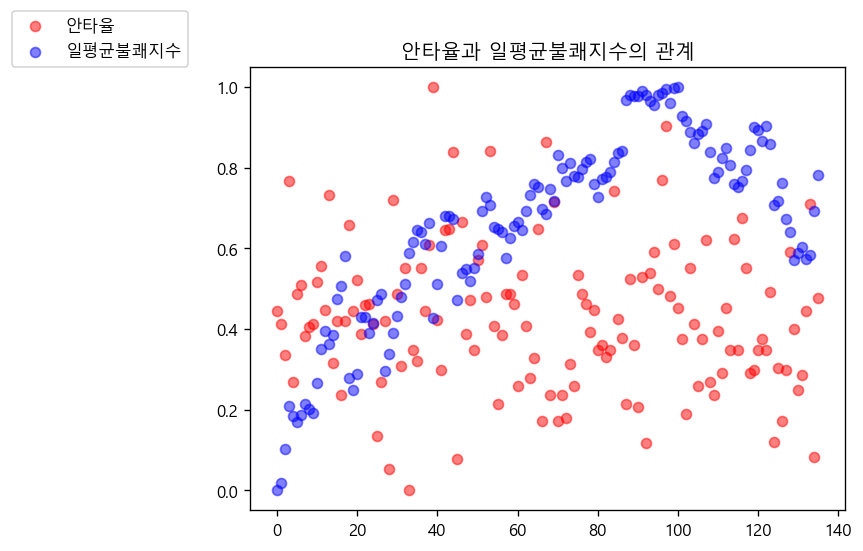

In [1712]:
plt.scatter(X, Y1, color='r', label='안타율', alpha=0.5)
plt.scatter(X, Y2, color='b', label='일평균불쾌지수',alpha=0.5)
plt.title('안타율과 일평균불쾌지수의 관계')
plt.legend(loc=(-0.4,1))
plt.show()

# 불쾌지수가 올라갈수록 안타율도 어느정도 일정하게 분포되어있다가 둘의 관계가 상관없게 됨
# 좀더 정확하게 알기 위해 안타율과 일평균 불쾌지수의 상관관계를 알아보려함

### 상관관계 도출

안타율과 일평균불쾌지수의 상관계수: -0.04753899513093793


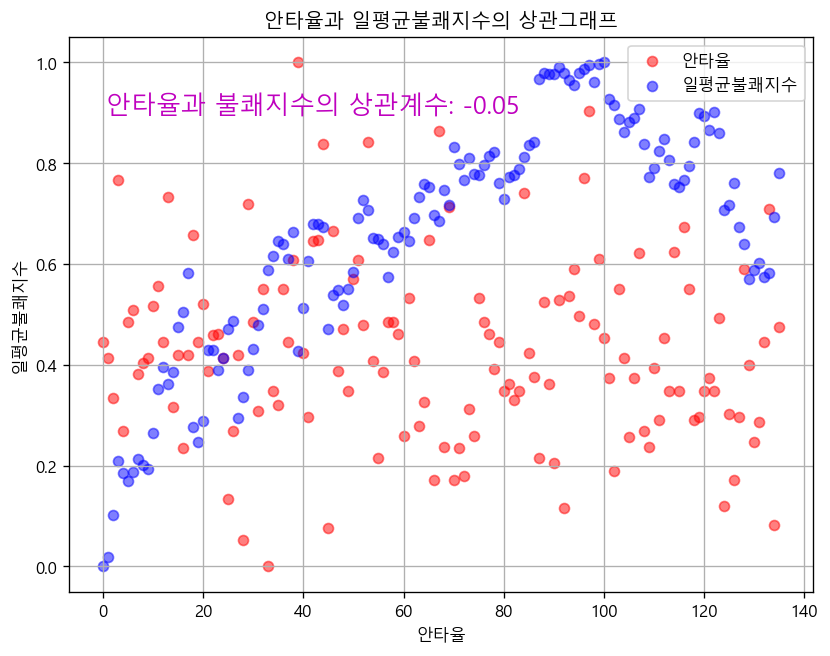

In [1713]:
# 상관관계 : -1 ~ 1 → 음의 상관관계인지, 아무런 상관관계가 없던지(0), 양의 상관관계인지

correlation = m_df['안타율_minMax'].corr(m_df['일평균불쾌지수_minMax'])

print(f"안타율과 일평균불쾌지수의 상관계수: {correlation}")# 데이터프레임에서 '안타율_minMax'와 '일평균불쾌지수_minMax' 열을 가져옴
correlation = m_df['안타율_minMax'].corr(m_df['일평균불쾌지수_minMax'])

# 산점도 그래프를 그리기 위해 데이터를 준비
x = m_df.index
y1= m_df['안타율_minMax']
y2 = m_df['일평균불쾌지수_minMax']

# 그래프 생성
plt.figure(figsize=(8, 6))
plt.scatter(x, y1, alpha=0.5, marker='o', color='r', label='안타율')
plt.scatter(x, y2, alpha=0.5, marker='o', color='b', label='일평균불쾌지수')

# 그래프 제목 및 축 레이블 설정
plt.title('안타율과 일평균불쾌지수의 상관그래프')
plt.xlabel('안타율')
plt.ylabel('일평균불쾌지수')

# 상관계수를 그래프에 표시
plt.text(0.7, 0.9, f'안타율과 불쾌지수의 상관계수: {correlation:.2f}', fontsize=15, color='m')

# 그래프를 표시
plt.legend()
plt.grid(True)
plt.savefig('./static/기아 불쾌지수에 따른 안타율')
plt.show()


### 그래프를 보니, 안타율과 일평균 불쾌지수는 상관관계가 약함
### 선수들의 컨디션을 잘 관리할 경우, 불쾌지수와 상관없이 안타율이 높을 확률이 있음

#### 그래프를 보니, 안타율과 일평균 불쾌지수는 상관관계가 약함
#### 선수들의 컨디션을 잘 관리할 경우, 불쾌지수와 상관없이 안타율이 높을 확률이 있음

# 4. 기아가 특정 구단에 승률이 낮은 이유 (박지뉴)


In [1714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
import seaborn as sns

In [1715]:
# https://www.kaggle.com/datasets/park123/korea-baseball-datasetkbo-20152020
# 데이터 설명 링크
# T_ID : 팀 이름
# TEAM
# HT : 기아
# HH : 한화
# KT : KT
# LG : LG
# LT : 롯데
# NC : NC
# OB : 두산
# SK : SSG
# SS : 삼성
# WO : 키움
# win : 1 = 승리, 0 = 패배, 0.5 = 무승부

- 2015년~2020년까지의 기아의 타구단에 대한 승률 구하기
- 가장 낮은 3개의 팀 추출

In [1716]:
# 그래프를 도출할 때 한글이 깨지지 않게 하기 위한 한글폰트 설정
plt.rcParams.update({'font.family':'Malgun Gothic',   
                    'figure.dpi':'120'})

- 2015년도 타구단에 대한 승률

In [1717]:
# 2015년도 파일 불러오기
baseball2015 = pd.read_csv('./static/baseball_2015.csv')

# 복사본 만들기
bs15 = baseball2015.copy()

# 결측치 여부 확인
bs15.info()

# 기아가 경기한 데이터만 추출 - 경기수가 144경기이므로 144행이 나오면 맞는 값 
# 추출 후 matchHT 변수에 대입
# 필요한 컬럼만 추출
# T_ID, VS_T_ID, win
matchHT15 = bs15[['T_ID','VS_T_ID','win']].query('T_ID=="HT"')

# 기아와 구단별 승패무 개수 추출
# winHT 변수에 대입
winHT15 = matchHT15.query('win==1').groupby(['T_ID','VS_T_ID','win'], as_index=False).agg(n = ('win','count'))

# 각 구단과 경기수는 16경기이기 때문에 승률을 구하기 위해서는 
# 이긴 경기 수 에서 16을 나눠야 한다
winHT15['15년도 승률'] = winHT15['n']/16

# 보기 편하게 컬럼 이름 변경
winHT15 = winHT15.rename(columns = {'VS_T_ID':'구단'})

# 이떄는 키움이 넥센이였기 때문에 value값 변경
winHT15['구단'] = winHT15['구단'].replace('NE','WO')

# 필요한 컬럼만 남기기
winHT15 = winHT15[['구단', '15년도 승률']]

# 승률 내림차순
winHT15 = winHT15.sort_values('15년도 승률',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G_ID       1438 non-null   object 
 1   GDAY_DS    1438 non-null   int64  
 2   T_ID       1438 non-null   object 
 3   VS_T_ID    1438 non-null   object 
 4   HEADER_NO  1438 non-null   int64  
 5   TB_SC      1438 non-null   object 
 6   PA         1438 non-null   float64
 7   AB         1438 non-null   float64
 8   RBI        1438 non-null   float64
 9   RUN        1438 non-null   float64
 10  HIT        1438 non-null   float64
 11  H2         1438 non-null   int64  
 12  H3         1438 non-null   int64  
 13  HR         1438 non-null   float64
 14  SB         1438 non-null   int64  
 15  CS         1438 non-null   int64  
 16  SF         1438 non-null   int64  
 17  BB         1438 non-null   float64
 18  HP         1438 non-null   float64
 19  KK         1438 non-null   float64
 20  GD      

Text(0.5, 1.0, '15년도 승률')

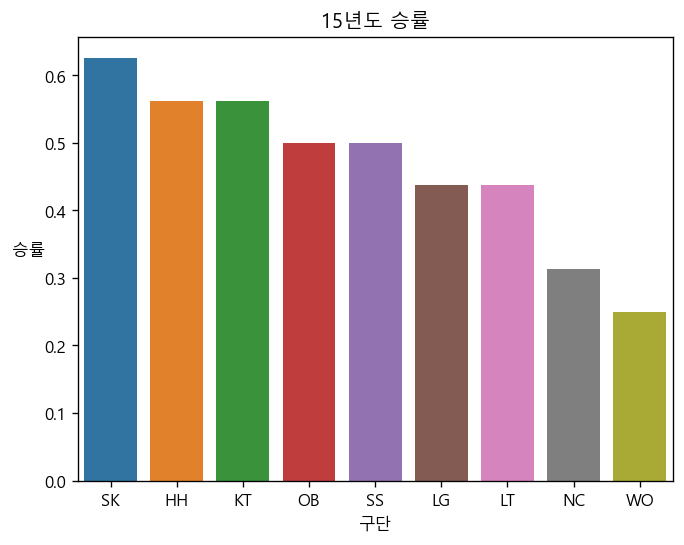

In [1718]:
# 구단에 대한 승률을 막대그래프로 시각화
sns.barplot(data=winHT15, x= '구단', y='15년도 승률')
plt.ylabel('승률   ',rotation=0)
plt.yticks(rotation=0)
plt.title('15년도 승률')

- 2016년도 타구단에 대한 승률

In [1719]:
# 2016년도 파일 불러오기
baseball2016 = pd.read_csv('./static/baseball_2016.csv')

# 복사본 만들기
bs16 = baseball2016.copy()

# 결측치 여부 확인
bs15.info()

# 기아가 경기한 데이터만 추출 - 경기수가 144경기이므로 144행이 나오면 맞는 값 
# 추출 후 matchHT 변수에 대입
# 필요한 컬럼만 추출
# T_ID, VS_T_ID, win
matchHT16 = bs16[['T_ID','VS_T_ID','win']].query('T_ID=="HT"')

# 기아와 구단별 승패무 개수 추출
# winHT 변수에 대입
winHT16 = matchHT16.query('win==1').groupby(['T_ID','VS_T_ID','win'], as_index=False).agg(n = ('win','count'))

# 각 구단과 경기수는 16경기이기 때문에 승률을 구하기 위해서는 
# 이긴 경기 수 에서 16을 나눠야 한다
winHT16['16년도 승률'] = winHT16['n']/16

# 보기 편하게 컬럼 이름 변경
winHT16 = winHT16.rename(columns = {'VS_T_ID':'구단'})

# 이떄는 키움이 넥센이였기 때문에 value값 변경
winHT16['구단'] = winHT16['구단'].replace('NE','WO')

# 필요한 컬럼만 남기기
winHT16 = winHT16[['구단', '16년도 승률']]

# 승률 내림차순
winHT16 = winHT16.sort_values('16년도 승률',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G_ID       1438 non-null   object 
 1   GDAY_DS    1438 non-null   int64  
 2   T_ID       1438 non-null   object 
 3   VS_T_ID    1438 non-null   object 
 4   HEADER_NO  1438 non-null   int64  
 5   TB_SC      1438 non-null   object 
 6   PA         1438 non-null   float64
 7   AB         1438 non-null   float64
 8   RBI        1438 non-null   float64
 9   RUN        1438 non-null   float64
 10  HIT        1438 non-null   float64
 11  H2         1438 non-null   int64  
 12  H3         1438 non-null   int64  
 13  HR         1438 non-null   float64
 14  SB         1438 non-null   int64  
 15  CS         1438 non-null   int64  
 16  SF         1438 non-null   int64  
 17  BB         1438 non-null   float64
 18  HP         1438 non-null   float64
 19  KK         1438 non-null   float64
 20  GD      

Text(0.5, 1.0, '16년도 승률')

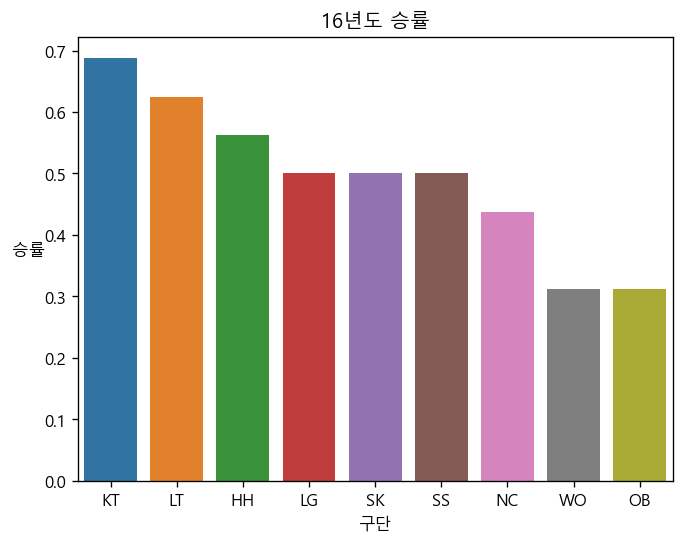

In [1720]:
# 구단에 대한 승률을 막대그래프로 시각화
sns.barplot(data=winHT16, x= '구단', y='16년도 승률')
plt.ylabel('승률   ',rotation=0)
plt.yticks(rotation=0)
plt.title('16년도 승률')

- 2017년도 타구단에 대한 승률

In [1721]:
# 2017년도 파일 불러오기
baseball2017 = pd.read_csv('./static/baseball_2017.csv')

# 복사본 만들기
bs17 = baseball2017.copy()

# 결측치 여부 확인
bs15.info()

# 기아가 경기한 데이터만 추출 - 경기수가 144경기이므로 144행이 나오면 맞는 값 
# 추출 후 matchHT 변수에 대입
# 필요한 컬럼만 추출
# T_ID, VS_T_ID, win
matchHT17 = bs17[['T_ID','VS_T_ID','win']].query('T_ID=="HT"')

# 기아와 구단별 승패무 개수 추출
# winHT 변수에 대입
winHT17 = matchHT17.query('win==1').groupby(['T_ID','VS_T_ID','win'], as_index=False).agg(n = ('win','count'))

# 각 구단과 경기수는 16경기이기 때문에 승률을 구하기 위해서는 
# 이긴 경기 수 에서 16을 나눠야 한다
winHT17['17년도 승률'] = winHT17['n']/16

# 보기 편하게 컬럼 이름 변경
winHT17 = winHT17.rename(columns = {'VS_T_ID':'구단'})

# 이떄는 키움이 넥센이였기 때문에 value값 변경
winHT17['구단'] = winHT17['구단'].replace('NE','WO')

# 필요한 컬럼만 남기기
winHT17 = winHT17[['구단', '17년도 승률']]

# 승률 내림차순
winHT17 = winHT17.sort_values('17년도 승률',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G_ID       1438 non-null   object 
 1   GDAY_DS    1438 non-null   int64  
 2   T_ID       1438 non-null   object 
 3   VS_T_ID    1438 non-null   object 
 4   HEADER_NO  1438 non-null   int64  
 5   TB_SC      1438 non-null   object 
 6   PA         1438 non-null   float64
 7   AB         1438 non-null   float64
 8   RBI        1438 non-null   float64
 9   RUN        1438 non-null   float64
 10  HIT        1438 non-null   float64
 11  H2         1438 non-null   int64  
 12  H3         1438 non-null   int64  
 13  HR         1438 non-null   float64
 14  SB         1438 non-null   int64  
 15  CS         1438 non-null   int64  
 16  SF         1438 non-null   int64  
 17  BB         1438 non-null   float64
 18  HP         1438 non-null   float64
 19  KK         1438 non-null   float64
 20  GD      

Text(0.5, 1.0, '17년도 승률')

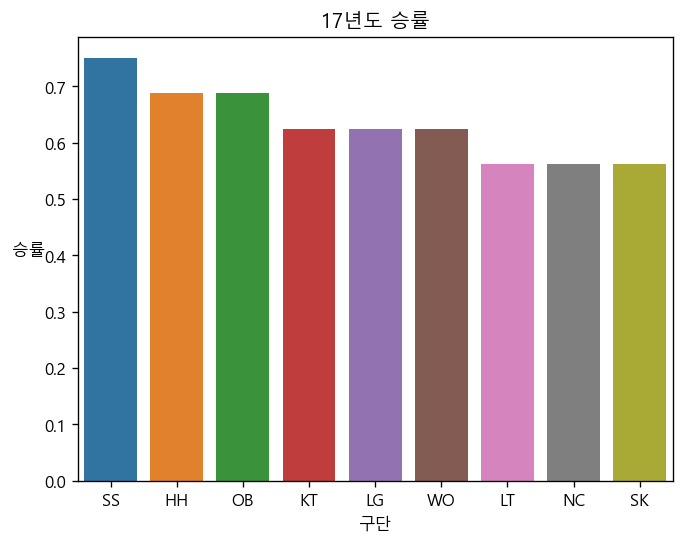

In [1722]:
# 구단에 대한 승률을 막대그래프로 시각화
sns.barplot(data=winHT17, x= '구단', y='17년도 승률')
plt.ylabel('승률   ',rotation=0)
plt.yticks(rotation=0)
plt.title('17년도 승률')

- 2018년도 타구단에 대한 승률

In [1723]:
# 2018년도 파일 불러오기
baseball2018 = pd.read_csv('./static/baseball_2018.csv')

# 복사본 만들기
bs18 = baseball2018.copy()

# 결측치 여부 확인
bs15.info()

# 기아가 경기한 데이터만 추출 - 경기수가 144경기이므로 144행이 나오면 맞는 값 
# 추출 후 matchHT 변수에 대입
# 필요한 컬럼만 추출
# T_ID, VS_T_ID, win
matchHT18 = bs18[['T_ID','VS_T_ID','win']].query('T_ID=="HT"')

# 기아와 구단별 승패무 개수 추출
# winHT 변수에 대입
winHT18 = matchHT18.query('win==1').groupby(['T_ID','VS_T_ID','win'], as_index=False).agg(n = ('win','count'))

# 각 구단과 경기수는 16경기이기 때문에 승률을 구하기 위해서는 
# 이긴 경기 수 에서 16을 나눠야 한다
winHT18['18년도 승률'] = winHT18['n']/16

# 보기 편하게 컬럼 이름 변경
winHT18 = winHT18.rename(columns = {'VS_T_ID':'구단'})

# 이떄는 키움이 넥센이였기 때문에 value값 변경
winHT18['구단'] = winHT18['구단'].replace('NE','WO')

# 필요한 컬럼만 남기기
winHT18 = winHT18[['구단', '18년도 승률']]

# 승률 내림차순
winHT18 = winHT18.sort_values('18년도 승률',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G_ID       1438 non-null   object 
 1   GDAY_DS    1438 non-null   int64  
 2   T_ID       1438 non-null   object 
 3   VS_T_ID    1438 non-null   object 
 4   HEADER_NO  1438 non-null   int64  
 5   TB_SC      1438 non-null   object 
 6   PA         1438 non-null   float64
 7   AB         1438 non-null   float64
 8   RBI        1438 non-null   float64
 9   RUN        1438 non-null   float64
 10  HIT        1438 non-null   float64
 11  H2         1438 non-null   int64  
 12  H3         1438 non-null   int64  
 13  HR         1438 non-null   float64
 14  SB         1438 non-null   int64  
 15  CS         1438 non-null   int64  
 16  SF         1438 non-null   int64  
 17  BB         1438 non-null   float64
 18  HP         1438 non-null   float64
 19  KK         1438 non-null   float64
 20  GD      

Text(0.5, 1.0, '18년도 승률')

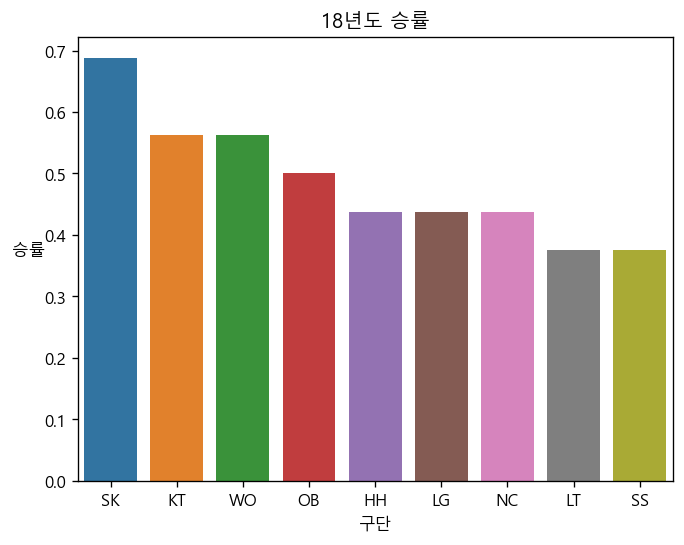

In [1724]:
# 구단에 대한 승률을 막대그래프로 시각화
sns.barplot(data=winHT18, x= '구단', y='18년도 승률')
plt.ylabel('승률   ',rotation=0)
plt.yticks(rotation=0)
plt.title('18년도 승률')

- 2019년도 타구단에 대한 승률

In [1725]:
# 2019년도 파일 불러오기
baseball2019 = pd.read_csv('./static/baseball_2019.csv')

# 복사본 만들기
bs19 = baseball2019.copy()

# 결측치 여부 확인
bs15.info()

# 기아가 경기한 데이터만 추출 - 경기수가 144경기이므로 144행이 나오면 맞는 값 
# 추출 후 matchHT 변수에 대입
# 필요한 컬럼만 추출
# T_ID, VS_T_ID, win
matchHT19 = bs19[['T_ID','VS_T_ID','win']].query('T_ID=="HT"')

# 기아와 구단별 승패무 개수 추출
# winHT 변수에 대입
winHT19 = matchHT19.query('win==1').groupby(['T_ID','VS_T_ID','win'], as_index=False).agg(n = ('win','count'))

# 각 구단과 경기수는 16경기이기 때문에 승률을 구하기 위해서는 
# 이긴 경기 수 에서 16을 나눠야 한다
winHT19['19년도 승률'] = winHT19['n']/16

# 보기 편하게 컬럼 이름 변경
winHT19 = winHT19.rename(columns = {'VS_T_ID':'구단'})

# 필요한 컬럼만 남기기
winHT19 = winHT19[['구단', '19년도 승률']]

# 승률 내림차순
winHT19 = winHT19.sort_values('19년도 승률',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G_ID       1438 non-null   object 
 1   GDAY_DS    1438 non-null   int64  
 2   T_ID       1438 non-null   object 
 3   VS_T_ID    1438 non-null   object 
 4   HEADER_NO  1438 non-null   int64  
 5   TB_SC      1438 non-null   object 
 6   PA         1438 non-null   float64
 7   AB         1438 non-null   float64
 8   RBI        1438 non-null   float64
 9   RUN        1438 non-null   float64
 10  HIT        1438 non-null   float64
 11  H2         1438 non-null   int64  
 12  H3         1438 non-null   int64  
 13  HR         1438 non-null   float64
 14  SB         1438 non-null   int64  
 15  CS         1438 non-null   int64  
 16  SF         1438 non-null   int64  
 17  BB         1438 non-null   float64
 18  HP         1438 non-null   float64
 19  KK         1438 non-null   float64
 20  GD      

Text(0.5, 1.0, '19년도 승률')

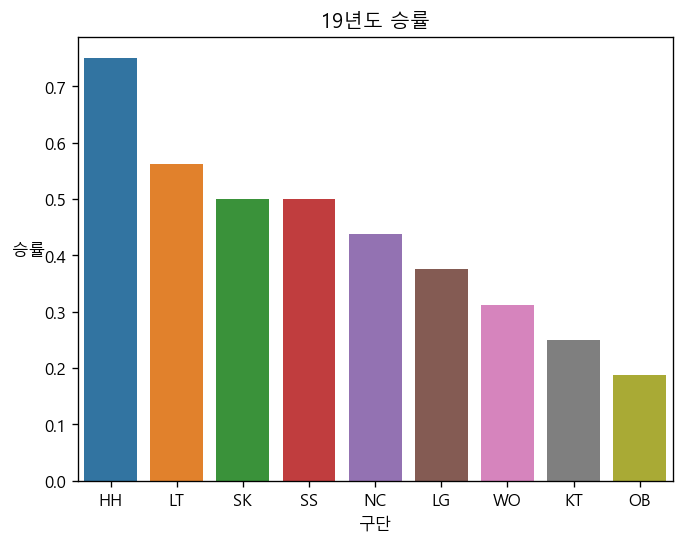

In [1726]:
# 구단에 대한 승률을 막대그래프로 시각화
sns.barplot(data=winHT19, x= '구단', y='19년도 승률')
plt.ylabel('승률   ',rotation=0)
plt.yticks(rotation=0)
plt.title('19년도 승률')

- 2020년도 타구단에 대한 승률

In [1727]:
# 2020년도 파일 불러오기
baseball2020 = pd.read_csv('./static/baseball_2020.csv')

# 복사본 만들기
bs20 = baseball2020.copy()

# 결측치 여부 확인
bs15.info()

# 기아가 경기한 데이터만 추출 - 경기수가 144경기이므로 144행이 나오면 맞는 값 
# 추출 후 matchHT 변수에 대입
# 필요한 컬럼만 추출
# T_ID, VS_T_ID, win
matchHT20 = bs20[['T_ID','VS_T_ID','win']].query('T_ID=="HT"')

# 기아와 구단별 승패무 개수 추출
# winHT 변수에 대입
winHT20 = matchHT20.query('win==1').groupby(['T_ID','VS_T_ID','win'], as_index=False).agg(n = ('win','count'))

# 각 구단과 경기수는 16경기이기 때문에 승률을 구하기 위해서는 
# 이긴 경기 수 에서 16을 나눠야 한다
winHT20['20년도 승률'] = winHT20['n']/16

# 보기 편하게 컬럼 이름 변경
winHT20 = winHT20.rename(columns = {'VS_T_ID':'구단'})

# 필요한 컬럼만 남기기
winHT20 = winHT20[['구단', '20년도 승률']]

# 승률 내림차순
winHT20 = winHT20.sort_values('20년도 승률',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G_ID       1438 non-null   object 
 1   GDAY_DS    1438 non-null   int64  
 2   T_ID       1438 non-null   object 
 3   VS_T_ID    1438 non-null   object 
 4   HEADER_NO  1438 non-null   int64  
 5   TB_SC      1438 non-null   object 
 6   PA         1438 non-null   float64
 7   AB         1438 non-null   float64
 8   RBI        1438 non-null   float64
 9   RUN        1438 non-null   float64
 10  HIT        1438 non-null   float64
 11  H2         1438 non-null   int64  
 12  H3         1438 non-null   int64  
 13  HR         1438 non-null   float64
 14  SB         1438 non-null   int64  
 15  CS         1438 non-null   int64  
 16  SF         1438 non-null   int64  
 17  BB         1438 non-null   float64
 18  HP         1438 non-null   float64
 19  KK         1438 non-null   float64
 20  GD      

Text(0.5, 1.0, '20년도 승률')

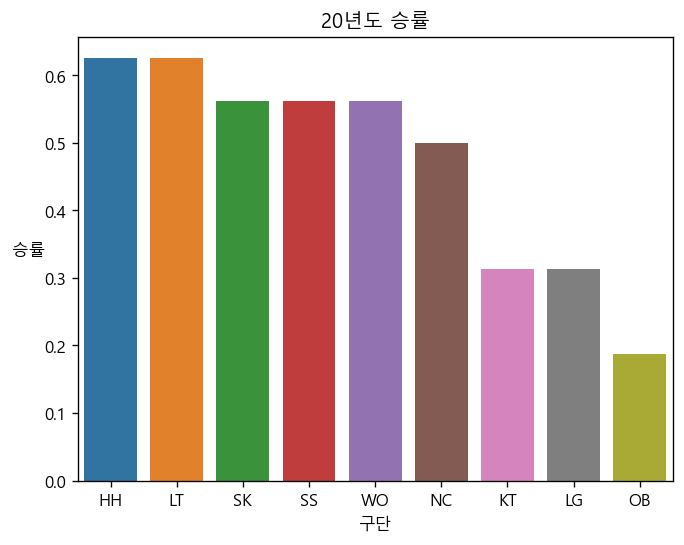

In [1728]:
# 구단에 대한 승률을 막대그래프로 시각화
sns.barplot(data=winHT20, x= '구단', y='20년도 승률')
plt.ylabel('승률   ',rotation=0)
plt.yticks(rotation=0)
plt.title('20년도 승률')

- 2015년 ~ 2020년까지의 타구단에 대한 승률 구하기

In [1729]:
# 2015년~2020년까지의 승률 합치기
winRate = pd.merge(winHT15, winHT16, how='inner', on = '구단')
winRate = pd.merge(winRate, winHT17, how='inner' , on = '구단')
winRate = pd.merge(winRate, winHT18, how='inner' , on = '구단')
winRate = pd.merge(winRate, winHT19, how='inner' , on = '구단')
winRate = pd.merge(winRate, winHT20, how='inner' , on = '구단')

In [1730]:
# 각 연도의 승률을 합쳐서 평균을 낸뒤 '승률 평균' 컬럼 생성
winRate['승률 평균'] = winRate[['15년도 승률','16년도 승률','17년도 승률',
                            '18년도 승률','19년도 승률','20년도 승률']].mean(axis=1).round(3)

# '승률 평균'컬럼을 기준으로 내림차순
winRate = winRate.sort_values(by = '승률 평균', ascending=False)

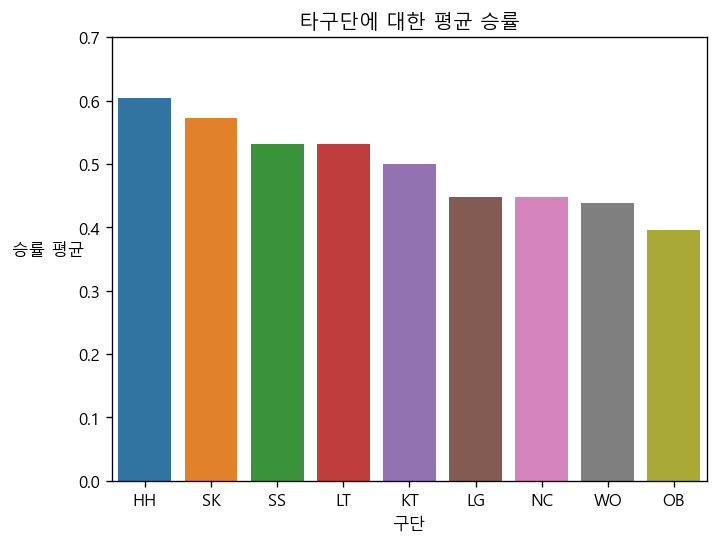

In [1731]:
# 2015년~2020년까지 기아의 타구단에 대한 평균 승률을 막대그래프로 표현
sns.barplot(data=winRate, x='구단', y='승률 평균')
plt.title('타구단에 대한 평균 승률')
plt.ylim(0,0.7)
plt.ylabel('승률 평균        ', rotation=0)
plt.savefig('./static/타구단에 대한 평균 승률')

- 타구단에 대한 승률 중 가장 낮은 구단을 선정 후 이유에 대한 분석
- 두산에 대해 승률이 가장 낮았던 연도로 분석
- 선수기량(안타, 2루타, 3루타, 홈런, 병살, 삼진, 볼넷)과 전술(도루성공, 도루실패, 희생플라이)로 나눠서 비교 

In [1732]:
# 승률평균에서 하위 1개 구하기
winRate = winRate.sort_values(by='승률 평균')
winRate[['구단','승률 평균']].head(3)

,구단,승률 평균
3,OB,0.396
8,WO,0.438
5,LG,0.448


- 두산에 대해 승률이 가장 낮았던 연도(19년도)로 분석, 승률: 1할 8푼 7리
- 선수기량(안타, 2루타, 3루타, 홈런, 병살, 삼진, 볼넷)과 전술(도루성공, 도루실패, 희생플라이)로 나눠서 비교 

In [1733]:
# 먼저 선수기량에 대한 비교를 하기위해 필요없는 컬럼 제거
# 'HOPlayer' 변수에 대입
HOPlayer19 = bs19[['T_ID','VS_T_ID','HIT','H2','H3','HR','GD','KK','BB']]

# 기아와 두산에 대한 경기만 필요함으로 나머지 경기데이터는 제거
# 'HOPlayer'에 재대입
HOPlayer19 = HOPlayer19[((HOPlayer19['T_ID']=='HT') &(HOPlayer19['VS_T_ID']=='OB'))|
     ((HOPlayer19['T_ID']=='OB')&(HOPlayer19['VS_T_ID']=='HT'))]

# 안타, 2루타, 3루타, 홈런은 하나로 합친 뒤 '안타 개수' 컬럼으로 추가
HOPlayer19['안타 개수'] = HOPlayer19[['HIT','H2','H3','HR']].sum(axis=1)

In [1734]:
# 구단의 전체 안타개수와 병살, 삼진, 볼넷 개수 구하기
HOPlayer19 = HOPlayer19.groupby('T_ID',as_index=False).agg(HITS=('안타 개수','sum'),GDS=('GD','sum'),KKS=('KK','sum'),BBS=('BB','sum'))

In [1735]:
# 보기 편하게 상수로
HOPlayer19[['HITS','GDS','KKS','BBS']] = HOPlayer19[['HITS','GDS','KKS','BBS']].astype(int)

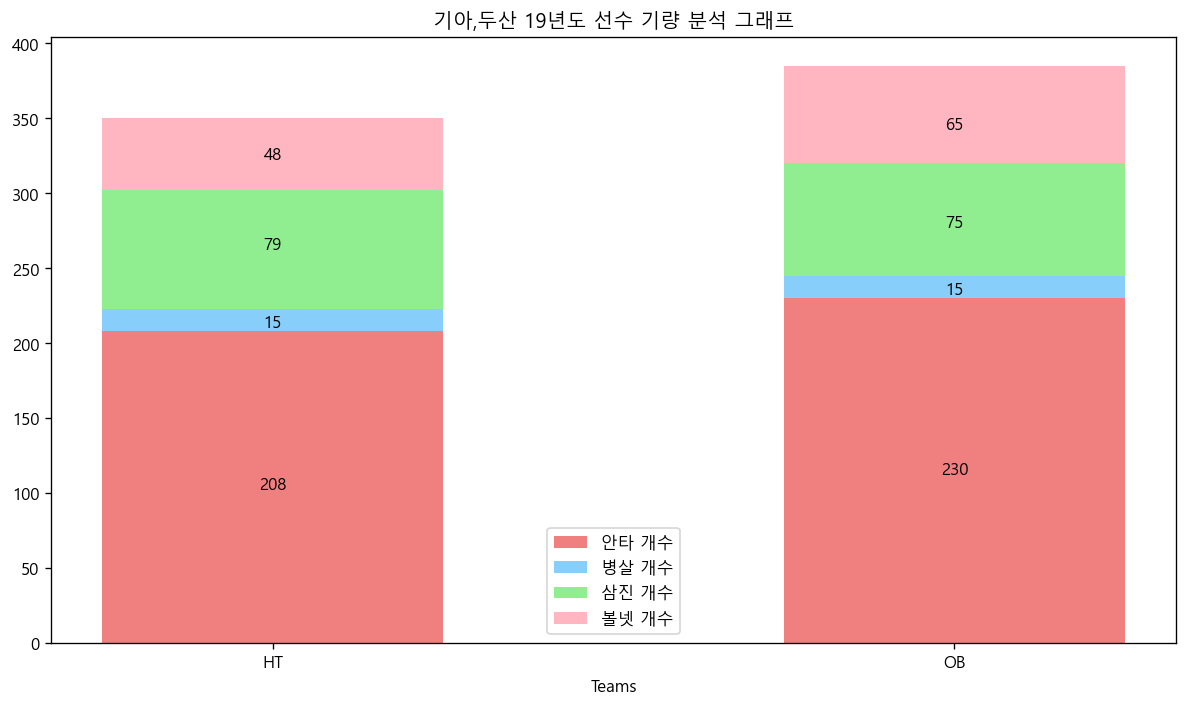

In [1736]:
teams = HOPlayer19['T_ID']
hits = HOPlayer19['HITS']
gds = HOPlayer19['GDS']
kks = HOPlayer19['KKS']
bbs = HOPlayer19['BBS']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

bar_width = 0.5
index = range(len(teams))

plt.bar(index, hits, width=bar_width, label='안타 개수', color='lightcoral')
plt.bar(index, gds, width=bar_width, label='병살 개수', color='lightskyblue', bottom=hits)
plt.bar(index, kks, width=bar_width, label='삼진 개수', color='lightgreen', bottom=hits + gds)
plt.bar(index, bbs, width=bar_width, label='볼넷 개수', color='lightpink', bottom=hits + gds + kks)

# 각 막대 위에 글씨 추가
plt.text(0, 100, str(hits[0]), ha='center', va='bottom')
plt.text(0, 208, str(gds[0]), ha='center', va='bottom')
plt.text(0, 260, str(kks[0]), ha='center', va='bottom')
plt.text(0, 320, str(bbs[0]), ha='center', va='bottom')


plt.text(1, 110, str(hits[1]), ha='center', va='bottom')
plt.text(1, 230, str(gds[1]), ha='center', va='bottom')
plt.text(1, 275, str(kks[1]), ha='center', va='bottom')
plt.text(1, 340, str(bbs[1]), ha='center', va='bottom')


# x 축 레이블과 범례 추가
plt.xlabel('Teams')
plt.xticks(index, teams)
plt.legend()

# 그래프 제목 추가
plt.title('기아,두산 19년도 선수 기량 분석 그래프')

# 그래프 표시
plt.tight_layout()
plt.savefig('./static/기아,두산 19년도 선수 기량 분석 그래프')
plt.show()

In [1737]:
# 기아의 전술에 대한 비교를 하기위해 필요없는 컬럼 제거
# 'HOTac'변수에 대입 
HOTac19 = bs19[['T_ID','VS_T_ID','SB','CS','SF']]

# 기아와 두산에 대한 경기만 필요함으로 나머지 경기데이터는 제거
# 'HOTac'에 재대입
HOTac19 = HOTac19[((HOTac19['T_ID']=='HT') &(HOTac19['VS_T_ID']=='OB'))|
     ((HOTac19['T_ID']=='OB')&(HOTac19['VS_T_ID']=='HT'))]

In [1738]:
# 구단의 전체 도루, 도루 실패, 희생플라이 개수에 대한 합 구하기
HOTac19 = HOTac19.groupby('T_ID', as_index=False).agg(SBS=('SB','sum'),CSS=('CS','sum'),SFS=('SF','sum'))

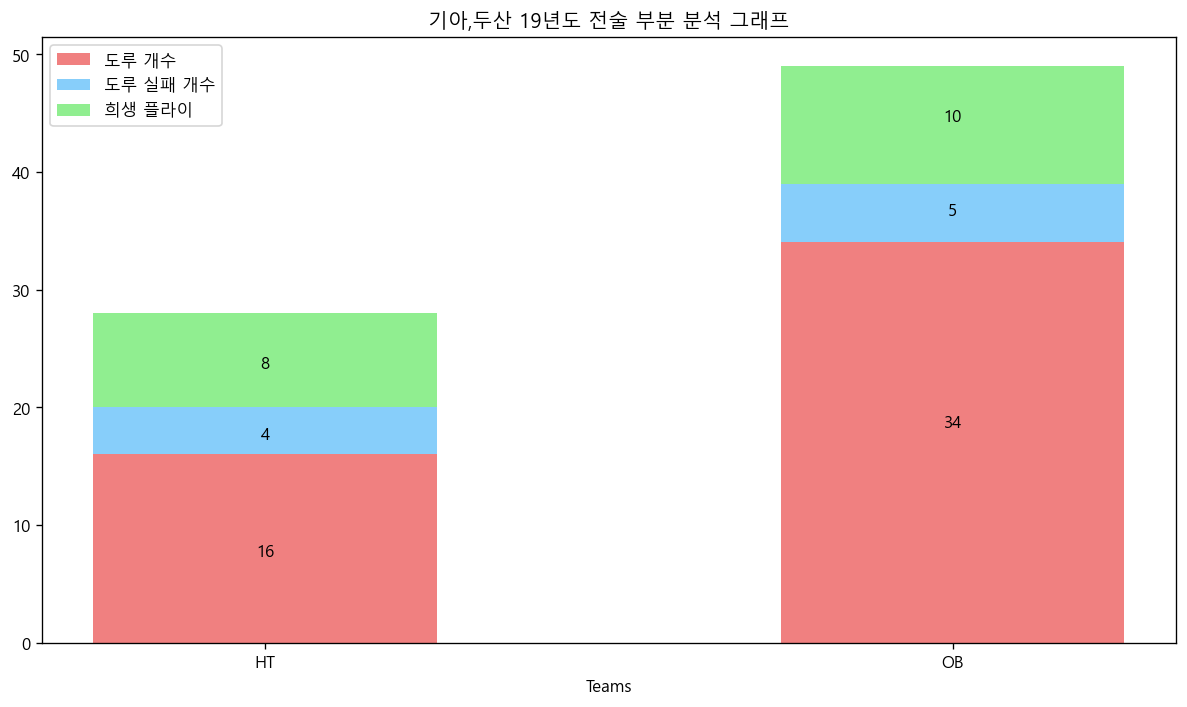

In [1739]:
teams = HOTac19['T_ID']
sbs = HOTac19['SBS']
css = HOTac19['CSS']
sfs = HOTac19['SFS']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

bar_width = 0.5
index = range(len(teams))

plt.bar(index, sbs, width=bar_width, label='도루 개수', color='lightcoral')
plt.bar(index, css, width=bar_width, label='도루 실패 개수', color='lightskyblue', bottom=sbs)
plt.bar(index, sfs, width=bar_width, label='희생 플라이', color='lightgreen', bottom=sbs + css)


# 각 막대 위에 글씨 추가
plt.text(0, 7, str(sbs[0]), ha='center', va='bottom')
plt.text(0, 17, str(css[0]), ha='center', va='bottom')
plt.text(0, 23, str(sfs[0]), ha='center', va='bottom')



plt.text(1, 18, str(sbs[1]), ha='center', va='bottom')
plt.text(1, 36, str(css[1]), ha='center', va='bottom')
plt.text(1, 44, str(sfs[1]), ha='center', va='bottom')



# x 축 레이블과 범례 추가
plt.xlabel('Teams')
plt.xticks(index, teams)
plt.legend()

# 그래프 제목 추가
plt.title('기아,두산 19년도 전술 부분 분석 그래프')

# 그래프 표시
plt.tight_layout()
plt.savefig('./static/기아,두산 19년도 전술 부분 분석 그래프')
plt.show()

- 이번에는 두산에게 가장 승률이 높은 연도(17년도) 확인, 승률: 6할 8푼 7리

In [1740]:
# 먼저 선수기량에 대한 비교를 하기위해 필요없는 컬럼 제거
# 'HOPlayer' 변수에 대입
HOPlayer17 = bs17[['T_ID','VS_T_ID','HIT','H2','H3','HR','GD','KK','BB']]

# 기아와 두산에 대한 경기만 필요함으로 나머지 경기데이터는 제거
# 'HOPlayer'에 재대입
HOPlayer17 = HOPlayer17[((HOPlayer17['T_ID']=='HT') &(HOPlayer17['VS_T_ID']=='OB'))|
     ((HOPlayer17['T_ID']=='OB')&(HOPlayer17['VS_T_ID']=='HT'))]

# 안타, 2루타, 3루타, 홈런은 하나로 합친 뒤 '안타 개수' 컬럼으로 추가
HOPlayer17['안타 개수'] = HOPlayer17[['HIT','H2','H3','HR']].sum(axis=1)

# 구단의 전체 안타개수와 병살, 삼진, 볼넷 개수 구하기
HOPlayer17 = HOPlayer17.groupby('T_ID',as_index=False).agg(HITS=('안타 개수','sum'),GDS=('GD','sum'),KKS=('KK','sum'),BBS=('BB','sum'))

# 보기 편하게 상수로 변경
HOPlayer17[['HITS','GDS','KKS','BBS']] = HOPlayer17[['HITS','GDS','KKS','BBS']].astype(int)

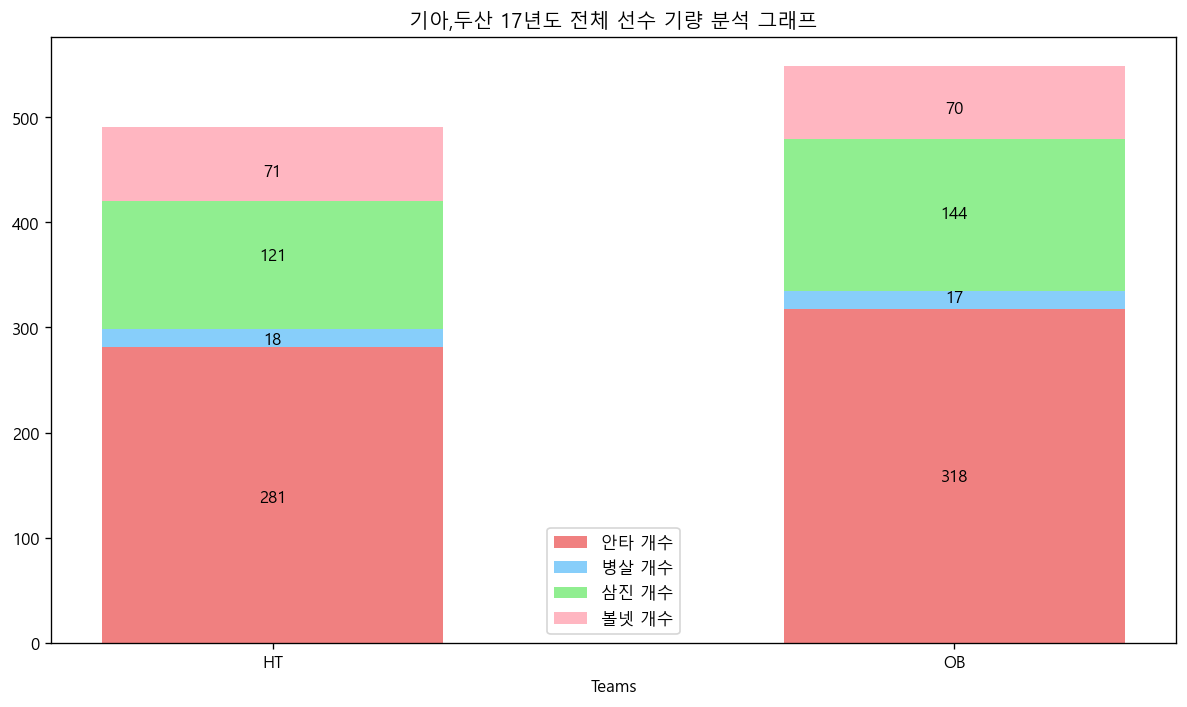

In [1741]:
teams = HOPlayer17['T_ID']
hits = HOPlayer17['HITS']
gds = HOPlayer17['GDS']
kks = HOPlayer17['KKS']
bbs = HOPlayer17['BBS']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

bar_width = 0.5
index = range(len(teams))

plt.bar(index, hits, width=bar_width, label='안타 개수', color='lightcoral')
plt.bar(index, gds, width=bar_width, label='병살 개수', color='lightskyblue', bottom=hits)
plt.bar(index, kks, width=bar_width, label='삼진 개수', color='lightgreen', bottom=hits + gds)
plt.bar(index, bbs, width=bar_width, label='볼넷 개수', color='lightpink', bottom=hits + gds + kks)

# 각 막대 위에 글씨 추가
plt.text(0, 130, str(hits[0]), ha='center', va='bottom')
plt.text(0, 280, str(gds[0]), ha='center', va='bottom')
plt.text(0, 360, str(kks[0]), ha='center', va='bottom')
plt.text(0, 440, str(bbs[0]), ha='center', va='bottom')


plt.text(1, 150, str(hits[1]), ha='center', va='bottom')
plt.text(1, 320, str(gds[1]), ha='center', va='bottom')
plt.text(1, 400, str(kks[1]), ha='center', va='bottom')
plt.text(1, 500, str(bbs[1]), ha='center', va='bottom')


# x 축 레이블과 범례 추가
plt.xlabel('Teams')
plt.xticks(index, teams)
plt.legend()

# 그래프 제목 추가
plt.title('기아,두산 17년도 전체 선수 기량 분석 그래프')

# 그래프 표시
plt.tight_layout()
plt.savefig('./static/기아,두산 17년도 선수 기량 분석 그래프')
plt.show()

In [1742]:
# 기아의 전술에 대한 비교를 하기위해 필요없는 컬럼 제거
# 'HOTac'변수에 대입 
HOTac17 = bs17[['T_ID','VS_T_ID','SB','CS','SF']]

# 기아와 두산에 대한 경기만 필요함으로 나머지 경기데이터는 제거
# 'HOTac'에 재대입
HOTac17 = HOTac17[((HOTac17['T_ID']=='HT') &(HOTac17['VS_T_ID']=='OB'))|
     ((HOTac17['T_ID']=='OB')&(HOTac17['VS_T_ID']=='HT'))]

# NE으로 하면 헷갈릴 수 있으니 WO로 변경
HOTac17['T_ID'] = HOTac17['T_ID'].replace('NE','WO')

# 구단의 전체 도루, 도루 실패, 희생플라이 개수에 대한 합 구하기
HOTac17 = HOTac17.groupby('T_ID', as_index=False).agg(SBS=('SB','sum'),CSS=('CS','sum'),SFS=('SF','sum'))

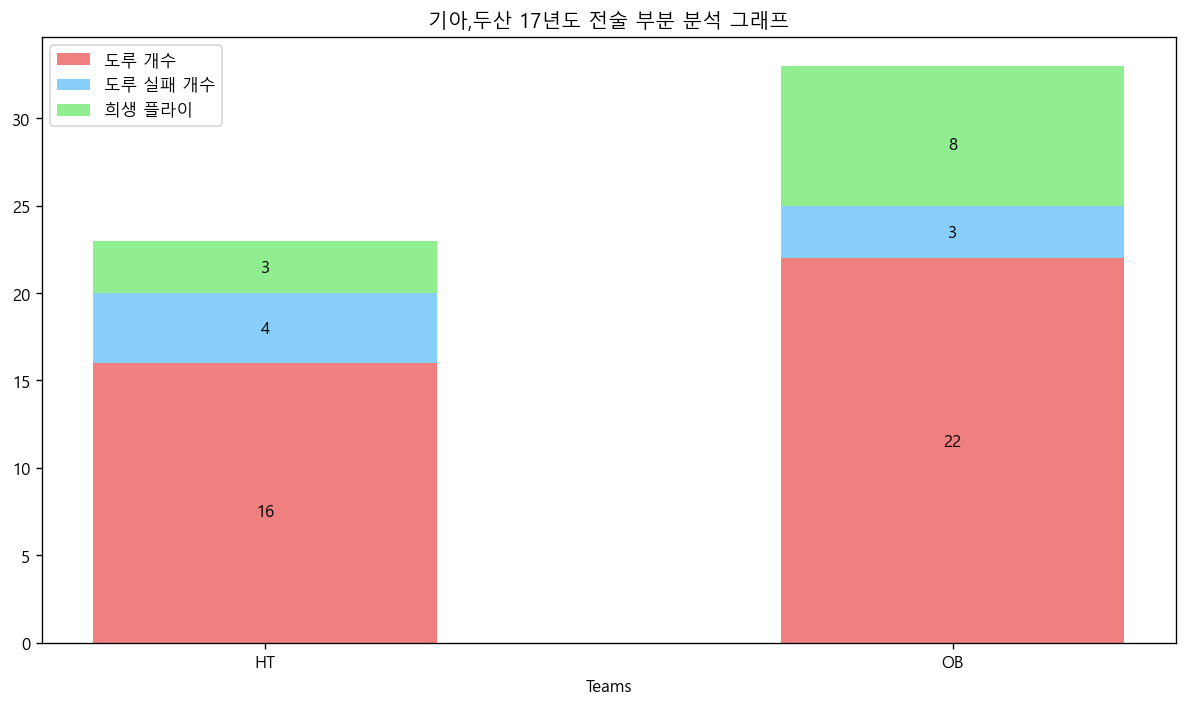

In [1743]:
teams = HOTac17['T_ID']
sbs = HOTac17['SBS']
css = HOTac17['CSS']
sfs = HOTac17['SFS']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

bar_width = 0.5
index = range(len(teams))

plt.bar(index, sbs, width=bar_width, label='도루 개수', color='lightcoral')
plt.bar(index, css, width=bar_width, label='도루 실패 개수', color='lightskyblue', bottom=sbs)
plt.bar(index, sfs, width=bar_width, label='희생 플라이', color='lightgreen', bottom=sbs + css)


# 각 막대 위에 글씨 추가
plt.text(0, 7, str(sbs[0]), ha='center', va='bottom')
plt.text(0, 17.5, str(css[0]), ha='center', va='bottom')
plt.text(0, 21, str(sfs[0]), ha='center', va='bottom')



plt.text(1, 11, str(sbs[1]), ha='center', va='bottom')
plt.text(1, 23, str(css[1]), ha='center', va='bottom')
plt.text(1, 28, str(sfs[1]), ha='center', va='bottom')



# x 축 레이블과 범례 추가
plt.xlabel('Teams')
plt.xticks(index, teams)
plt.legend()

# 그래프 제목 추가
plt.title('기아,두산 17년도 전술 부분 분석 그래프')

# 그래프 표시
plt.tight_layout()
plt.savefig('./static/기아,두산 17년도 전술 부분 분석 그래프')
plt.show()

## 결과
- 두산에게 승률이 낮을 때는 선수기량은 비슷하나 전술적인 부분에서 부족함
- 두산이 기아와 만날 때 전술적으로 더 높다고 볼 수 있음
- 발빠른 선수를 주전으로 내보내거나 대주자로 사용하여 전술을 사용할 수 있는 폭을 넓혀야함
- 타격은 비슷하나 이렇게 승률이 낮다는 것은 출루만 하고 점수를 얻지 못했다는 뜻
- 그렇다면 감독이 두산의 주자들이 쌓였을 때 적절한 투수교체를 하고 기아가 주자가 쌓였을 때
   상황에 적절한 전술(대타, 번트, 희생플라이, 강공 등)을 상대 투수에 맞춰서 지휘를 해야함

----------------------------------------------------------------------------------------------------------------------------------

- 다음으로 키움에 대해 승률이 가장 낮았던 연도(15년도)로 분석, 승률: 2할 5푼
- 선수기량(안타, 2루타, 3루타, 홈런, 병살, 삼진, 볼넷)과 전술(도루성공, 도루실패, 희생플라이)로 나눠서 비교 

In [1744]:
# 먼저 선수기량에 대한 비교를 하기위해 필요없는 컬럼 제거
# 'HOPlayer' 변수에 대입
HOPlayer15 = bs15[['T_ID','VS_T_ID','HIT','H2','H3','HR','GD','KK','BB']]

# 기아와 두산에 대한 경기만 필요함으로 나머지 경기데이터는 제거
# 'HOPlayer'에 재대입
HOPlayer15 = HOPlayer15[((HOPlayer15['T_ID']=='HT') &(HOPlayer15['VS_T_ID']=='NE'))|
     ((HOPlayer15['T_ID']=='NE')&(HOPlayer15['VS_T_ID']=='HT'))]

# NE으로 하면 헷갈릴 수 있으니 WO로 변경
HOPlayer15['T_ID'] = HOPlayer15['T_ID'].replace('NE','WO')

# 안타, 2루타, 3루타, 홈런은 하나로 합친 뒤 '안타 개수' 컬럼으로 추가
HOPlayer15['안타 개수'] = HOPlayer15[['HIT','H2','H3','HR']].sum(axis=1)

# 구단의 전체 안타개수와 병살, 삼진, 볼넷 개수 구하기
HOPlayer15 = HOPlayer15.groupby('T_ID',as_index=False).agg(HITS=('안타 개수','sum'),GDS=('GD','sum'),KKS=('KK','sum'),BBS=('BB','sum'))

# 보기 편하게 상수로 변경
HOPlayer15[['HITS','GDS','KKS','BBS']] = HOPlayer15[['HITS','GDS','KKS','BBS']].astype(int)

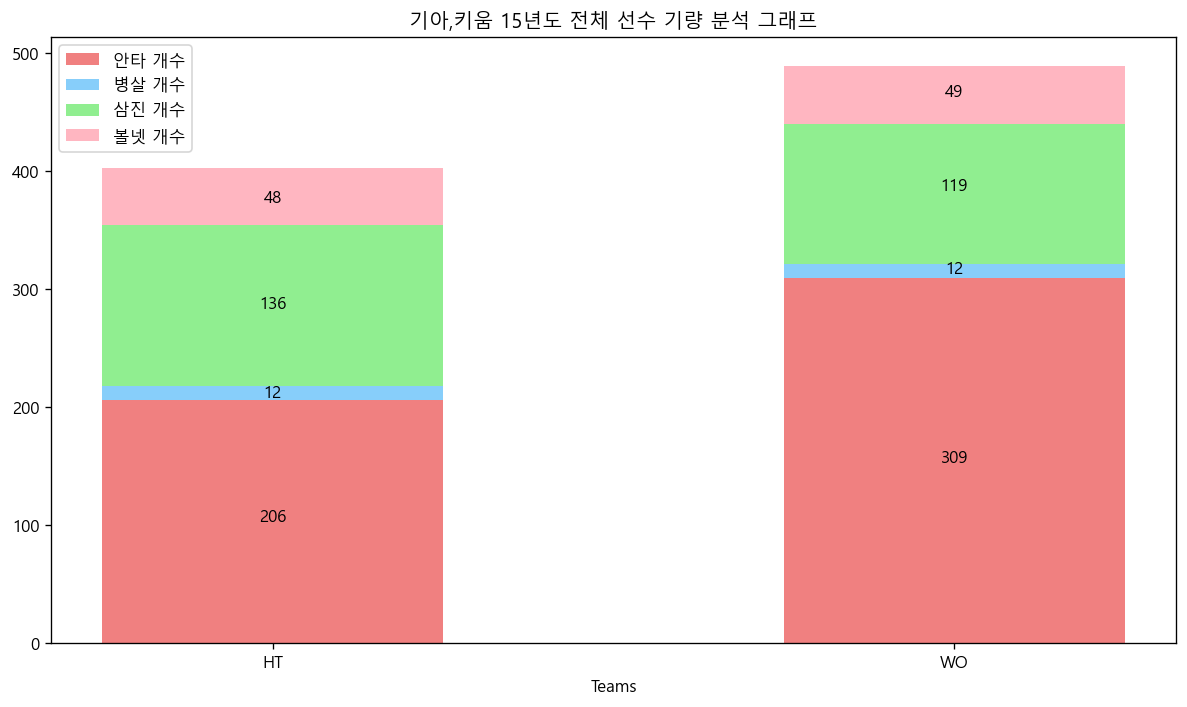

In [1745]:
teams = HOPlayer15['T_ID']
hits = HOPlayer15['HITS']
gds = HOPlayer15['GDS']
kks = HOPlayer15['KKS']
bbs = HOPlayer15['BBS']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

bar_width = 0.5
index = range(len(teams))

plt.bar(index, hits, width=bar_width, label='안타 개수', color='lightcoral')
plt.bar(index, gds, width=bar_width, label='병살 개수', color='lightskyblue', bottom=hits)
plt.bar(index, kks, width=bar_width, label='삼진 개수', color='lightgreen', bottom=hits + gds)
plt.bar(index, bbs, width=bar_width, label='볼넷 개수', color='lightpink', bottom=hits + gds + kks)

# 각 막대 위에 글씨 추가
plt.text(0, 100, str(hits[0]), ha='center', va='bottom')
plt.text(0, 205, str(gds[0]), ha='center', va='bottom')
plt.text(0, 280, str(kks[0]), ha='center', va='bottom')
plt.text(0, 370, str(bbs[0]), ha='center', va='bottom')


plt.text(1, 150, str(hits[1]), ha='center', va='bottom')
plt.text(1, 310, str(gds[1]), ha='center', va='bottom')
plt.text(1, 380, str(kks[1]), ha='center', va='bottom')
plt.text(1, 460, str(bbs[1]), ha='center', va='bottom')


# x 축 레이블과 범례 추가
plt.xlabel('Teams')
plt.xticks(index, teams)
plt.legend()

# 그래프 제목 추가
plt.title('기아,키움 15년도 전체 선수 기량 분석 그래프')

# 그래프 표시
plt.tight_layout()
plt.savefig('./static/기아,키움 15년도 선수 기량 분석 그래프')
plt.show()

In [1746]:
# 기아의 전술에 대한 비교를 하기위해 필요없는 컬럼 제거
# 'HOTac'변수에 대입 
HOTac15 = bs15[['T_ID','VS_T_ID','SB','CS','SF']]

# 기아와 두산에 대한 경기만 필요함으로 나머지 경기데이터는 제거
# 'HOTac'에 재대입
HOTac15 = HOTac15[((HOTac15['T_ID']=='HT') &(HOTac15['VS_T_ID']=='NE'))|
     ((HOTac15['T_ID']=='NE')&(HOTac15['VS_T_ID']=='HT'))]

# NE으로 하면 헷갈릴 수 있으니 WO로 변경
HOTac15['T_ID'] = HOTac15['T_ID'].replace('NE','WO')

# 구단의 전체 도루, 도루 실패, 희생플라이 개수에 대한 합 구하기
HOTac15 = HOTac15.groupby('T_ID', as_index=False).agg(SBS=('SB','sum'),CSS=('CS','sum'),SFS=('SF','sum'))

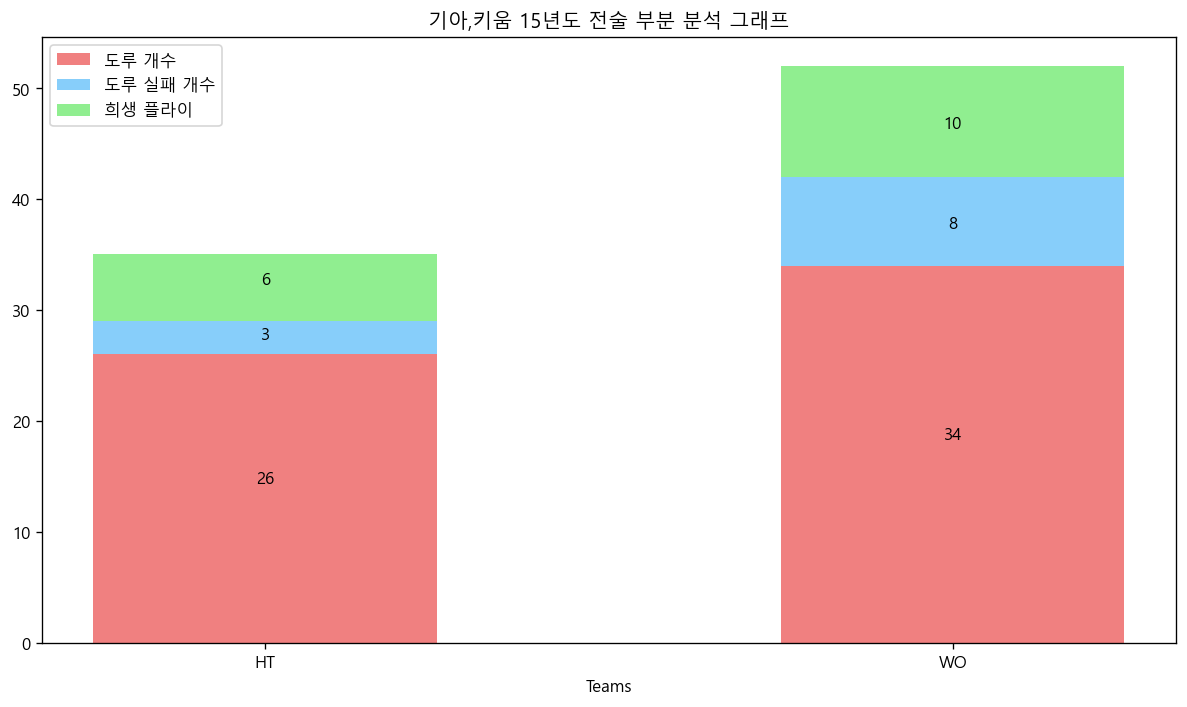

In [1747]:
teams = HOTac15['T_ID']
sbs = HOTac15['SBS']
css = HOTac15['CSS']
sfs = HOTac15['SFS']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

bar_width = 0.5
index = range(len(teams))

plt.bar(index, sbs, width=bar_width, label='도루 개수', color='lightcoral')
plt.bar(index, css, width=bar_width, label='도루 실패 개수', color='lightskyblue', bottom=sbs)
plt.bar(index, sfs, width=bar_width, label='희생 플라이', color='lightgreen', bottom=sbs + css)


# 각 막대 위에 글씨 추가
plt.text(0, 14, str(sbs[0]), ha='center', va='bottom')
plt.text(0, 27, str(css[0]), ha='center', va='bottom')
plt.text(0, 32, str(sfs[0]), ha='center', va='bottom')



plt.text(1, 18, str(sbs[1]), ha='center', va='bottom')
plt.text(1, 37, str(css[1]), ha='center', va='bottom')
plt.text(1, 46, str(sfs[1]), ha='center', va='bottom')



# x 축 레이블과 범례 추가
plt.xlabel('Teams')
plt.xticks(index, teams)
plt.legend()

# 그래프 제목 추가
plt.title('기아,키움 15년도 전술 부분 분석 그래프')

# 그래프 표시
plt.tight_layout()
plt.savefig('./static/기아,키움 15년도 전술 부분 분석 그래프')
plt.show()

- 이번에는 키움에게 가장 승률이 높은 연도(17년도) 확인, 승률: 6할 2푼 5리

In [1748]:
# 먼저 선수기량에 대한 비교를 하기위해 필요없는 컬럼 제거
# 'HOPlayer' 변수에 대입
HOPlayer17 = bs17[['T_ID','VS_T_ID','HIT','H2','H3','HR','GD','KK','BB']]

# 기아와 두산에 대한 경기만 필요함으로 나머지 경기데이터는 제거
# 'HOPlayer'에 재대입
HOPlayer17 = HOPlayer17[((HOPlayer17['T_ID']=='HT') &(HOPlayer17['VS_T_ID']=='NE'))|
     ((HOPlayer17['T_ID']=='NE')&(HOPlayer17['VS_T_ID']=='HT'))]

# NE으로 하면 헷갈릴 수 있으니 WO로 변경
HOPlayer17['T_ID'] = HOPlayer17['T_ID'].replace('NE','WO')

# 안타, 2루타, 3루타, 홈런은 하나로 합친 뒤 '안타 개수' 컬럼으로 추가
HOPlayer17['안타 개수'] = HOPlayer17[['HIT','H2','H3','HR']].sum(axis=1)

# 구단의 전체 안타개수와 병살, 삼진, 볼넷 개수 구하기
HOPlayer17 = HOPlayer17.groupby('T_ID',as_index=False).agg(HITS=('안타 개수','sum'),GDS=('GD','sum'),KKS=('KK','sum'),BBS=('BB','sum'))

# 보기 편하게 상수로 변경
HOPlayer17[['HITS','GDS','KKS','BBS']] = HOPlayer17[['HITS','GDS','KKS','BBS']].astype(int)

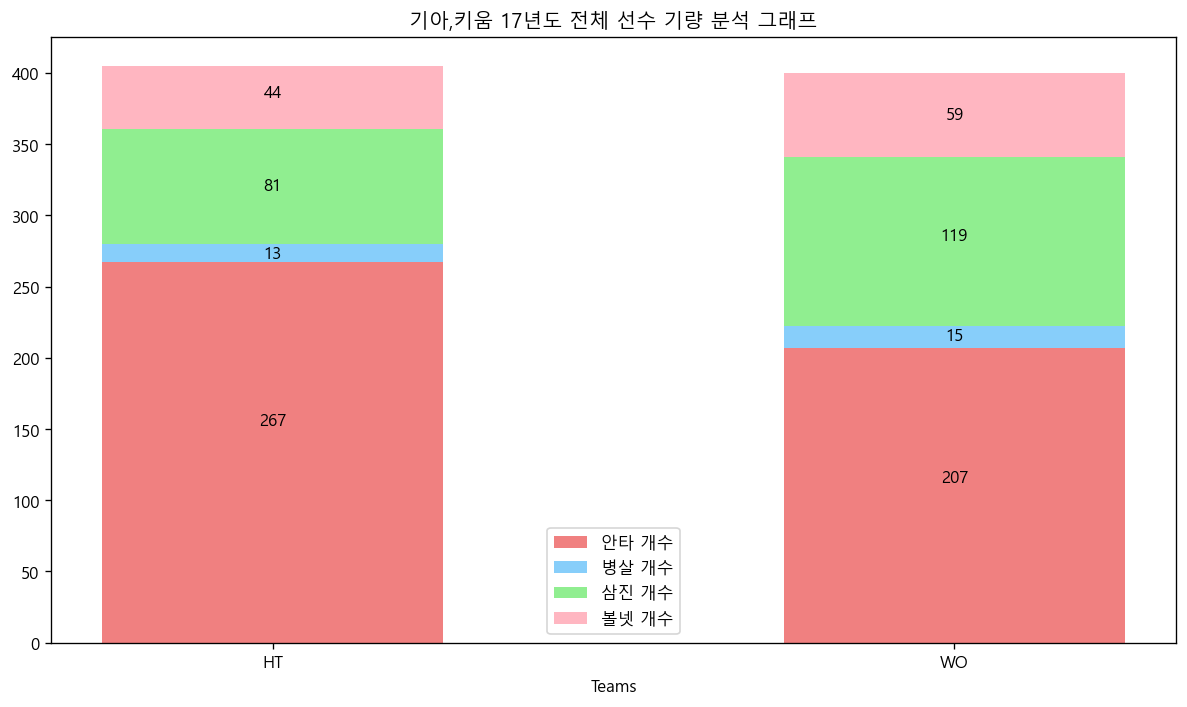

In [1749]:
teams = HOPlayer17['T_ID']
hits = HOPlayer17['HITS']
gds = HOPlayer17['GDS']
kks = HOPlayer17['KKS']
bbs = HOPlayer17['BBS']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

bar_width = 0.5
index = range(len(teams))

plt.bar(index, hits, width=bar_width, label='안타 개수', color='lightcoral')
plt.bar(index, gds, width=bar_width, label='병살 개수', color='lightskyblue', bottom=hits)
plt.bar(index, kks, width=bar_width, label='삼진 개수', color='lightgreen', bottom=hits + gds)
plt.bar(index, bbs, width=bar_width, label='볼넷 개수', color='lightpink', bottom=hits + gds + kks)

# 각 막대 위에 글씨 추가
plt.text(0, 150, str(hits[0]), ha='center', va='bottom')
plt.text(0, 267, str(gds[0]), ha='center', va='bottom')
plt.text(0, 315, str(kks[0]), ha='center', va='bottom')
plt.text(0, 380, str(bbs[0]), ha='center', va='bottom')


plt.text(1, 110, str(hits[1]), ha='center', va='bottom')
plt.text(1, 210, str(gds[1]), ha='center', va='bottom')
plt.text(1, 280, str(kks[1]), ha='center', va='bottom')
plt.text(1, 365, str(bbs[1]), ha='center', va='bottom')


# x 축 레이블과 범례 추가
plt.xlabel('Teams')
plt.xticks(index, teams)
plt.legend()

# 그래프 제목 추가
plt.title('기아,키움 17년도 전체 선수 기량 분석 그래프')

# 그래프 표시
plt.tight_layout()
plt.savefig('./static/기아,키움 17년도 선수 기량 분석 그래프')
plt.show()

In [1750]:
# 기아의 전술에 대한 비교를 하기위해 필요없는 컬럼 제거
# 'HOTac'변수에 대입 
HOTac17 = bs17[['T_ID','VS_T_ID','SB','CS','SF']]

# 기아와 두산에 대한 경기만 필요함으로 나머지 경기데이터는 제거
# 'HOTac'에 재대입
HOTac17 = HOTac17[((HOTac17['T_ID']=='HT') &(HOTac17['VS_T_ID']=='NE'))|
     ((HOTac17['T_ID']=='NE')&(HOTac17['VS_T_ID']=='HT'))]

# NE으로 하면 헷갈릴 수 있으니 WO로 변경
HOTac17['T_ID'] = HOTac17['T_ID'].replace('NE','WO')

# 구단의 전체 도루, 도루 실패, 희생플라이 개수에 대한 합 구하기
HOTac17 = HOTac17.groupby('T_ID', as_index=False).agg(SBS=('SB','sum'),CSS=('CS','sum'),SFS=('SF','sum'))

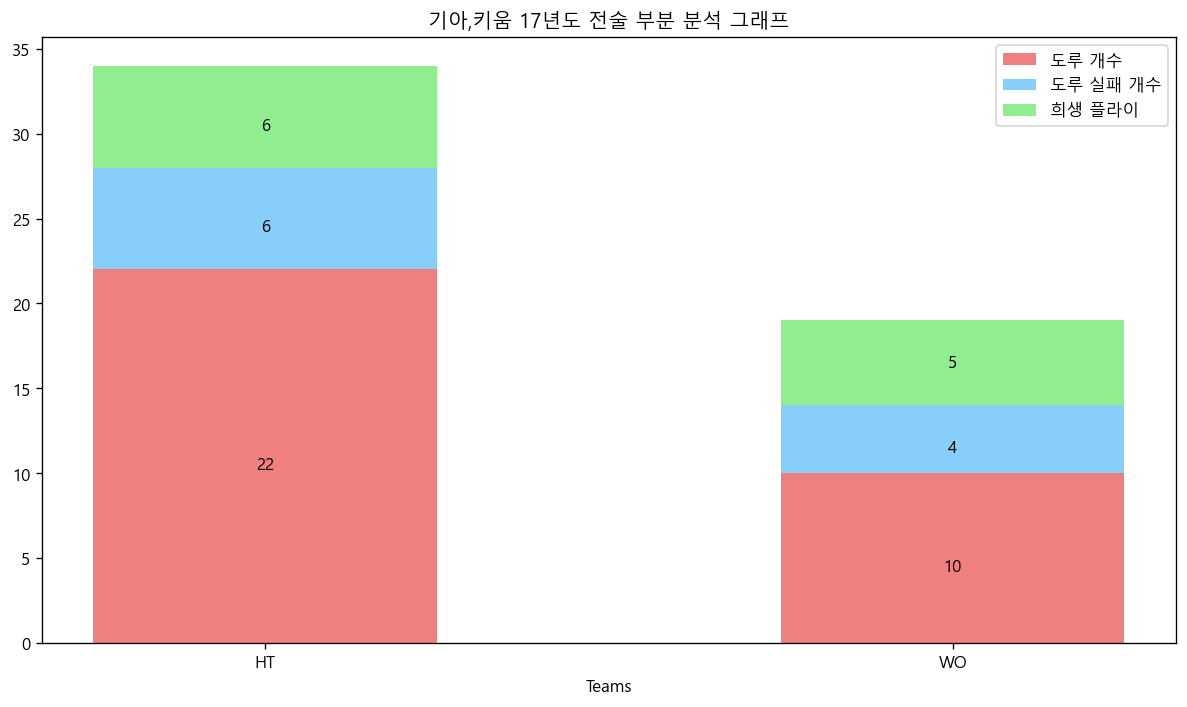

In [1751]:
teams = HOTac17['T_ID']
sbs = HOTac17['SBS']
css = HOTac17['CSS']
sfs = HOTac17['SFS']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

bar_width = 0.5
index = range(len(teams))

plt.bar(index, sbs, width=bar_width, label='도루 개수', color='lightcoral')
plt.bar(index, css, width=bar_width, label='도루 실패 개수', color='lightskyblue', bottom=sbs)
plt.bar(index, sfs, width=bar_width, label='희생 플라이', color='lightgreen', bottom=sbs + css)


# 각 막대 위에 글씨 추가
plt.text(0, 10, str(sbs[0]), ha='center', va='bottom')
plt.text(0, 24, str(css[0]), ha='center', va='bottom')
plt.text(0, 30, str(sfs[0]), ha='center', va='bottom')



plt.text(1, 4, str(sbs[1]), ha='center', va='bottom')
plt.text(1, 11, str(css[1]), ha='center', va='bottom')
plt.text(1, 16, str(sfs[1]), ha='center', va='bottom')



# x 축 레이블과 범례 추가
plt.xlabel('Teams')
plt.xticks(index, teams)
plt.legend()

# 그래프 제목 추가
plt.title('기아,키움 17년도 전술 부분 분석 그래프')

# 그래프 표시
plt.tight_layout()
plt.savefig('./static/기아,키움 17년도 선수 기량 분석 그래프')
plt.show()

## 결론
- 키움에 승률이 낮을 때 전술적인 부분은 비슷하나 선수기량(타격)부분이 많이 떨어짐
- 반대로 선수 기량이 키움보다 좋으면 승률이 높음
- 키움과 경기를 치룰 때 키움 투수들에 대한 분석이 필요함
- 투수에 대한 구종, 타이밍, 습관들을 분석해서 기아 타자들에게 학습시켜야함
- 감독역할도 중요하나 타격코치에 대한 역할이 더욱 중요할 것으로 보임

# 5. 2023년 관중수에 따른 기아 홈 구단 승률 (송세림)

In [1752]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

## 관중수 데이터 크롤링

In [1753]:
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

In [1754]:
# 크롬드라이버로 페이지 이동
# 출처 KBO공식 홈
#driver = wb.Chrome()
#driver.get("https://www.koreabaseball.com/Record/Crowd/GraphDaily.aspx")

# # 창 최대화
# driver.maximize_window()

In [1755]:
# 광주 설정 버튼 생성
#btn_GJ = driver.find_element(By.CSS_SELECTOR,"#cphContents_cphContents_cphContents_ddlStadium > option:nth-child(3)")
#btn_GJ.click()

# 충돌방지 ^-^
# time.sleep(0.1)

# 검색 버튼 생성
#btn_search = driver.find_element(By.CSS_SELECTOR,"#cphContents_cphContents_cphContents_btnSearch")
#btn_search.click()

In [1756]:
# # 날짜 추출 / 날짜 리스트 만들기
# crowd_date =driver.find_elements(By.CSS_SELECTOR,'#cphContents_cphContents_cphContents_udpRecord > table > tbody > tr:nth-child(n) > td:nth-child(1)')

# crowd_dates = []

# for i in range(len(crowd_date)):
#     crowd_dates.append(crowd_date[i].text)

In [1757]:
# # 상대팀 추출 / 상대팀 리스트 만들기
# op_team =driver.find_elements(By.CSS_SELECTOR,'#cphContents_cphContents_cphContents_udpRecord > table > tbody > tr:nth-child(n) > td:nth-child(4)')

# op_teams = []

# for i in range(len(op_team)):
#     op_teams.append(op_team[i].text)

In [1758]:
# # 관중수 추출 / 관중수 리스트 만들기
# crowd =driver.find_elements(By.CSS_SELECTOR,'#cphContents_cphContents_cphContents_udpRecord > table > tbody > tr:nth-child(n) > td:nth-child(6)')

# crowd_list = []

# for i in range(len(crowd)):
#     crowd_list.append(crowd[i].text)

In [1759]:
crowd2023

,일자,원정팀,관중수
0,0407,두산,12821
1,0408,두산,16432
2,0409,두산,14070
3,0411,한화,3623
4,0412,한화,5252
...,...,...,...
66,1010,SSG,8333
67,1011,키움,3656
68,1012,롯데,4767
69,1016,NC,5251


In [1760]:
# # 관중 데이터프레임 만들기
# crowd2023 = pd.DataFrame({'일자': crowd_dates, '원정팀': op_teams, '관중수': crowd_list})

# # 저장
# crowd2023 = pd.DataFrame(crowd2023)
# crowd2023.to_csv("./static/kia_crowd_2023.csv", index=False)

## 스코어 데이터 전처리

In [1761]:
# 2023 데이터프레임 불러오기

data1 = pd.read_excel("./static/202303~202304.xlsx")
data2 = pd.read_excel("./static/202305~202306.xlsx")
data3 = pd.read_excel("./static/202307~202308.xlsx")
data4 = pd.read_excel("./static/202309~202310.xlsx")

C:\Users\smhrd\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\smhrd\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\smhrd\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\smhrd\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [1762]:
## 컬럼명 재설정

# 첫 행을 기준으로 컬럼명 재설정 
data1.columns = data1.iloc[0]
data2.columns = data2.iloc[0]
data3.columns = data3.iloc[0]
data4.columns = data4.iloc[0]

# 2023 데이터프레임 병합/ 일자별로 정렬 / 인덱스 재설정
data_2023 = pd.concat([data1, data2, data3, data4])\
            .sort_values(by='일자').reset_index(drop=True)

# 불필요한 컬럼 삭제
del data_2023['단체']
del data_2023['리그']
del data_2023['시간']
del data_2023['장소']
del data_2023['홈팀']
del data_2023['년도']

# 불필요한 행 삭제
data_2023 = data_2023[data_2023['일자'] != '일자']

# 불필요한 데이터 삭제
data_2023['일자'] = data_2023['일자'].str.replace('[가-힣]','',regex=True)
data_2023['일자'] = data_2023['일자'].str.replace('[^\w]','',regex=True)


# 스코어 분리하기후 삭제
data_2023[['KIA스코어','원정팀스코어']] = data_2023['스코어'].str.split(':', expand=True)
del data_2023['스코어']

In [1763]:
data_2023

,일자,원정팀,KIA스코어,원정팀스코어
0,0407,두산,1,4
1,0408,두산,7,6
2,0409,두산,2,3
3,0411,한화,4,5
4,0412,한화,2,0
...,...,...,...,...
80,1010,SSG,5,6
81,1011,키움히어로즈,11,0
82,1012,롯데,6,5
83,1016,NC,4,2


##  데이터 병합

In [1764]:
crowd2023 = pd.read_csv("./static/kia_crowd_2023.csv")
# 전처리
crowd2023['일자'] = crowd2023['일자'].str.replace('2023','')
crowd2023['일자'] = crowd2023['일자'].str.replace('[^\w]','',regex=True)
crowd2023['관중수'] = crowd2023['관중수'].str.replace('[^\w]','',regex=True)

In [1765]:
crowd2023

,일자,원정팀,관중수
0,0407,두산,12821
1,0408,두산,16432
2,0409,두산,14070
3,0411,한화,3623
4,0412,한화,5252
...,...,...,...
66,1010,SSG,8333
67,1011,키움,3656
68,1012,롯데,4767
69,1016,NC,5251


In [1766]:
merge_2023 = pd.merge(data_2023,crowd2023, how='outer',on='일자')

In [1767]:
# 중복컬럼 확인 후 제거
# merge_2023['원정팀_x'].isna().sum()
merge_2023.rename(columns={'원정팀_x': '원정팀'}, inplace=True)

merge_2023['원정팀_y'].isna().sum()
del merge_2023['원정팀_y']

In [1768]:
# 결측치 제거 / 인덱스 재설정
merge_2023 = merge_2023.dropna().reset_index(drop=True)
merge_2023

,일자,원정팀,KIA스코어,원정팀스코어,관중수
0,0407,두산,1,4,12821
1,0408,두산,7,6,16432
2,0409,두산,2,3,14070
3,0411,한화,4,5,3623
4,0412,한화,2,0,5252
...,...,...,...,...,...
68,1010,SSG,5,6,8333
69,1011,키움히어로즈,11,0,3656
70,1012,롯데,6,5,4767
71,1016,NC,4,2,5251


In [1769]:
# 승패 컬럼 추가

# Series 형변환
merge_2023['원정팀스코어'] = merge_2023['원정팀스코어'].astype(int)
merge_2023['KIA스코어'] = merge_2023['KIA스코어'].astype(int)



# 승패 컬럼 생성
merge_2023['승패'] = merge_2023['KIA스코어'] - merge_2023['원정팀스코어'] 

merge_2023['승패'] = np.where(merge_2023['승패']> 0,'승',np.where(merge_2023['승패']< 0,'패','무'))
merge_2023


,일자,원정팀,KIA스코어,원정팀스코어,관중수,승패
0,0407,두산,1,4,12821,패
1,0408,두산,7,6,16432,승
2,0409,두산,2,3,14070,패
3,0411,한화,4,5,3623,패
4,0412,한화,2,0,5252,승
...,...,...,...,...,...,...
68,1010,SSG,5,6,8333,패
69,1011,키움히어로즈,11,0,3656,승
70,1012,롯데,6,5,4767,승
71,1016,NC,4,2,5251,승


## 데이터 도출
### 관중수에 따른 승패 차이

In [1770]:
# 형변환
merge_2023['관중수'] = merge_2023['관중수'].astype(int)
merge_2023['일자'] = merge_2023['일자'].astype(int)

In [1771]:
# 관중수 최대, 최소 확인
merge_2023['관중수'].max() # 19030
merge_2023['관중수'].min() # 2216

merge_2023

,일자,원정팀,KIA스코어,원정팀스코어,관중수,승패
0,407,두산,1,4,12821,패
1,408,두산,7,6,16432,승
2,409,두산,2,3,14070,패
3,411,한화,4,5,3623,패
4,412,한화,2,0,5252,승
...,...,...,...,...,...,...
68,1010,SSG,5,6,8333,패
69,1011,키움히어로즈,11,0,3656,승
70,1012,롯데,6,5,4767,승
71,1016,NC,4,2,5251,승


In [1772]:
def crows_n(data):
    if data >= 18000:
        return '18이상'
    elif data >= 17000:
        return '17'
    elif data >= 16000:
        return '16'
    elif data >= 15000:
        return '15'
    elif data >= 14000:
        return '14'
    elif data >= 13000:
        return '13'
    elif data >= 12000:
        return '12'
    elif data >= 11000:
        return '11'
    elif data >= 10000:
        return '10'
    elif data >= 9000:
        return '09'
    elif data >= 8000:
        return '08'
    elif data >= 7000:
        return '07'
    elif data >= 6000:
        return '06'
    elif data >= 5000:
        return '05'
    elif data >= 4000:
        return '04'
    elif data >= 3000:
        return '03'
    elif data >= 2000:
        return '02'
    else:
        return '0'
    
merge_2023['관중수등급'] = merge_2023['관중수'].apply(crows_n)
merge_2023['관중수등급'] = merge_2023['관중수등급']

In [1773]:
plt.rcParams.update({'font.family':'Malgun Gothic'})

In [1774]:
merge_count = merge_2023\
.groupby(['관중수등급', '승패' ],as_index=False).agg(n=('승패', 'count'))\
.sort_values('관중수등급')

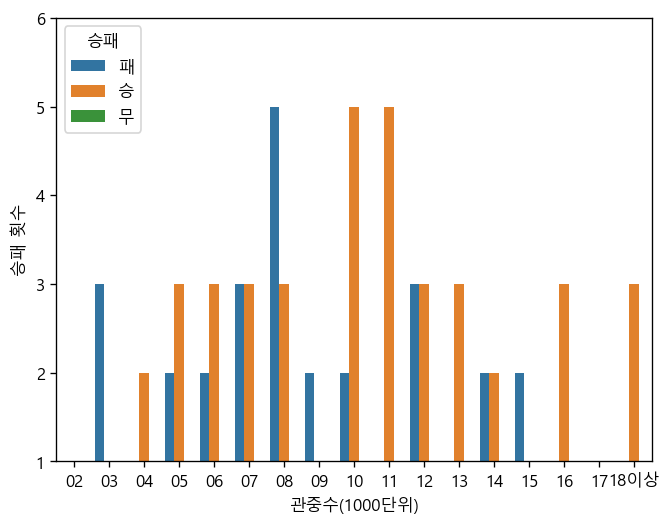

In [1775]:
sns.barplot(data = merge_count, x = '관중수등급', y = 'n',hue='승패')
plt.xlabel('관중수(1000단위)')
plt.ylabel('승패 횟수')
plt.ylim(1, 6)
plt.savefig('./static/기아 2023년 관중수와 승률 분석 그래프')

## 결과 도출
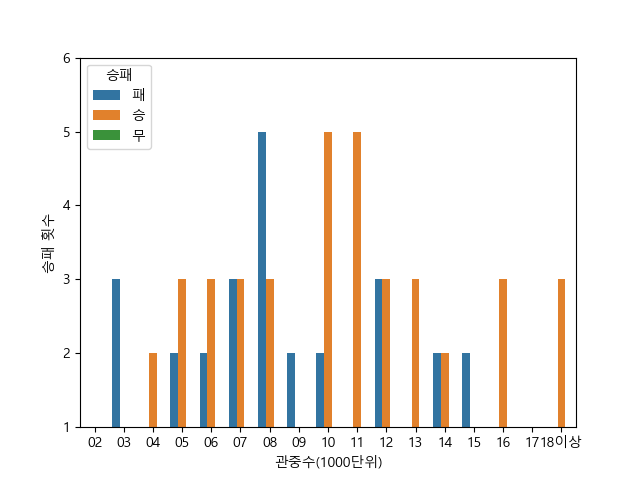

 - 관중수가 8,000명대 패배 횟수가 가장 높다.
 - 관중수가 10,000-11,0000명 대 일때 승리 횟수가 가장 높다.
 - 관중 10,000명 이상이 될때부터 패배 보다 승리 횟수가 높아 진다.
 - 관중 3,000명 이하 일때 100%의 확률로 패배한다.  
 - 관중 16,000명 이상일 때 100%의 확률로 승리한다.  
   
 #### 변화가 미미해 보이나 관중수가 3,000면 이하 이거나 17,000명 이상일때, 11,000명대 였을때  승패에 확실한 영향을 준다.



# 6. 17년도 기아우승영상 워드클라우드로 시각화 (임은영)

In [1776]:
# 폴더나 파일 생성 라이브러리
import os # operating System

from selenium import webdriver as wb
from bs4 import BeautifulSoup as bs

# url의 내용(경로)을 토대로 파일 형태(jpg,png 등)로 다운로드 하는데 사용되는 라이브러리
from urllib.request import urlretrieve

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

import pandas as pd

import time

import konlpy 
from konlpy.tag import Kkma, Komoran, Okt, Hannanum 
okt = Okt() 

In [1777]:
# driver=wb.Chrome()
# driver.get('https://www.youtube.com/watch?v=oIwLBPc5PSs')

In [1778]:
# comment=driver.find_elements(By.CSS_SELECTOR,'#content-text')

In [1779]:
# for i in comment:
#     print(i.text)

In [1780]:
# comment_list=[]
# for i in range(len(comment)):
#     comment_list.append(comment[i].text)
#     print(comment_list)

In [1781]:
# dic={'댓글':comment_list}
# kia_you=pd.DataFrame(dic)
# kia_you

In [1782]:
kia_you = pd.read_csv('./static/기아 워드클라우드.csv')
kia_you = kia_you.set_index('Unnamed: 0')
kia_you = kia_you.dropna()

In [1783]:
kia_you['댓글']=kia_you['댓글'].str.replace('[^가-힣]',' ',regex=True)

In [1784]:
kkma=konlpy.tag.Kkma()

In [1785]:
nouns = kia_you['댓글'].apply(kkma.nouns)
nouns

Unnamed: 0
0                                          [그리움, 년도, 도장]
1      [기아, 번, 트레이드, 성공, 범, 범호, 호, 김, 김주찬, 주찬, 등, 고참,...
2      [야구, 완벽, 풀타임, 선발, 심, 심동섭, 동섭, 김, 김세연, 세연, 등, 마...
3      [나, 경기, 차, 차전, 전, 양, 양현종, 현종, 완봉승, 회, 회초, 초, 관...
4          [이때, 우승, 거, 시즌, 기아, 기아팬, 팬, 터, 번은, 야구장, 듯, 때]
                             ...                        
717                                            [기아, 전라도]
718                                          [수비, 수준, 낮]
719                                               [응, 키]
720                                                   []
722                                                [전라도]
Name: 댓글, Length: 721, dtype: object

In [1786]:
nouns=nouns.explode()
nouns

Unnamed: 0
0      그리움
0       년도
0       도장
1       기아
1        번
      ... 
718      낮
719      응
719      키
720    NaN
722    전라도
Name: 댓글, Length: 5347, dtype: object

In [1787]:
# 두 글자 이상으로 된 단어만 남기고 단어 빈도표 생성
# 데이터 프레임 생성하기
df_word=pd.DataFrame({'word':nouns})
df_word

#글자 수(count) 라는 새로운 컬럼 생성
#str이용해서 문자열로 변환
#len 메서드를 통해 문자길이 확인
df_word['count']=df_word['word'].str.len()
df_word

# 두 글자 이상 단어만 남기기
# query 메서드 활용
# .query('조건')

df_word=df_word.query('count>=2')
df_word

,word,count
Unnamed: 0,,
0,그리움,3.0
0,년도,2.0
0,도장,2.0
1,기아,2.0
1,트레이드,4.0
...,...,...
717,기아,2.0
717,전라도,3.0
718,수비,2.0


In [1788]:
df_word=df_word.groupby('word',as_index=False).agg(word_count = ('word','count')).sort_values(by='word_count',ascending=False)

In [1789]:
df_top20=df_word.head(20)
df_top20

,word,word_count
140,기아,156
824,우승,102
1283,현종,90
708,양현종,75
1094,차전,58
896,이때,57
440,버나,39
618,시리즈,37
441,버나디,35
1244,한국,32


<Axes: xlabel='word_count', ylabel='word'>

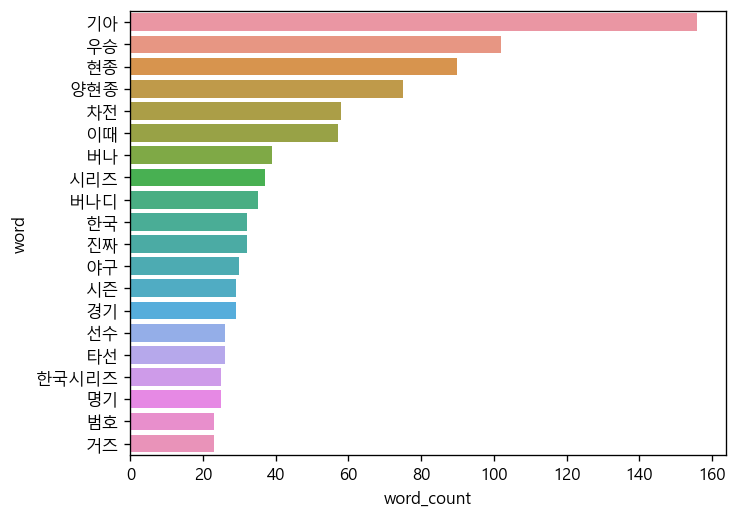

In [1790]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Malgun Gothic'})

sns.barplot(data=df_top20,x='word_count',y='word')

### 워드 클라우드 만들기

In [1791]:
# 데이터프레임을 딕셔너리로 변환
df_word=df_word.set_index('word').to_dict()['word_count']

In [1792]:
import PIL 
icon=PIL.Image.open('./static/kiawordcloud.png')

import numpy as np
img =PIL.Image.new('RGB',icon.size,(255,255,255)) #새로운 RGB 이미지 생성
img.paste(icon,icon) # 이미지에 icon 이미지를 붙여넣기 
img=np.array(img)

In [1793]:
from wordcloud import WordCloud
# font 경로 설정
# 글꼴 - 속성 

font =r'C:\WINDOWS\FONTS\MALGUNSL.ttf'

# wc만들기
wc=WordCloud(random_state = 56,
          font_path = font,
          width = 400,
          height = 400,
          background_color = 'white',
          mask=img,
          colormap='magma')

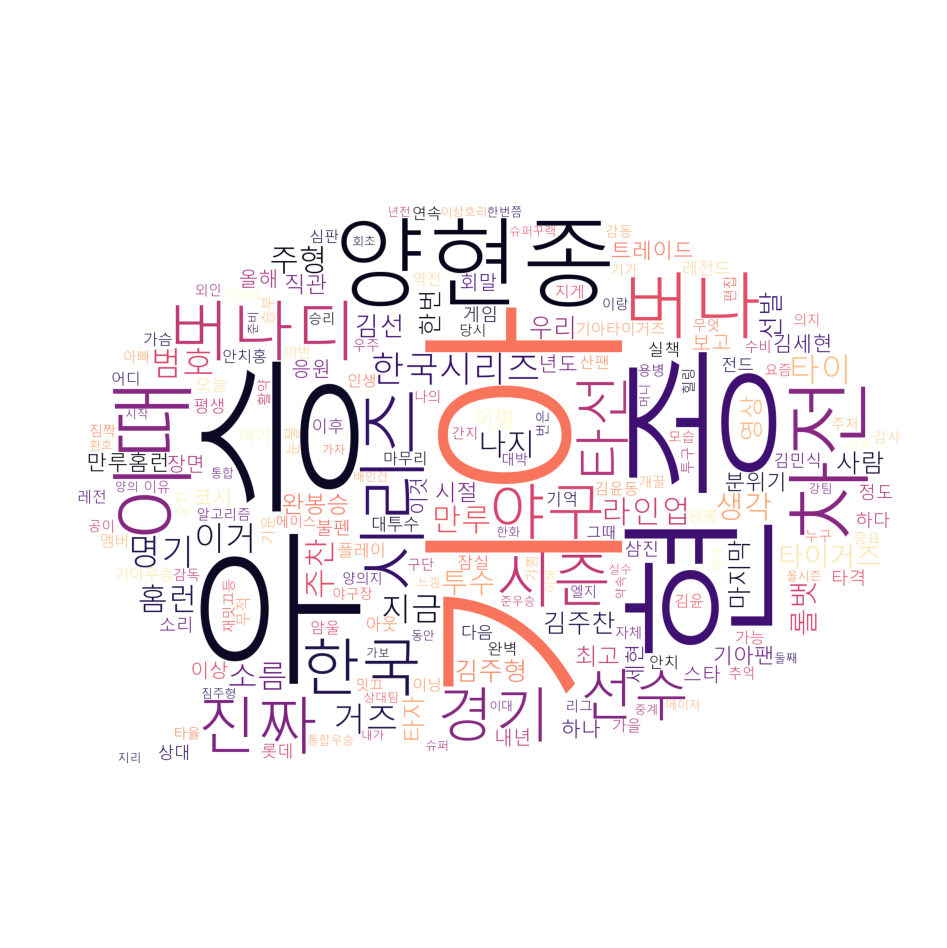

In [1794]:
# 워드 클라우드 만들기
img_kia=wc.generate_from_frequencies(df_word)

# 워드 클라우드 출력하기
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_kia)

plt.savefig('wordcloud_kia.png', bbox_inches='tight', pad_inches=0.1, transparent=True)

# 저장한 이미지를 화면에 표시 (선택 사항)
plt.show()

In [1795]:
# plt.savefig('wordcloud_kia.png', bbox_inches='tight', pad_inches=0.1, transparent=True)

# # 저장한 이미지를 화면에 표시 (선택 사항)
# plt.show()